In [2]:
import numpy as np

from load_data_mongoloids import load_data_mongoloids
from mongoloids_config import config

#from load_data_cancer import load_data_cancer
#from cancer_config import config

from transform_data import *
import time
import matplotlib
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats

from configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 70
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
  'axes.labelsize': fontsize,
  'axes.titlesize':fontsize,
  'xtick.labelsize':fontsize,
  'ytick.labelsize':fontsize,
  'font.size':fontsize}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 

plt.style.use('ggplot')
%matplotlib inline

import igraph
import cairo

In [3]:
#from load_data_down_GSE63347 import load_data_down_GSE63347
#from down_GSE63347_config import config

from configurations.load_data_down_GSE63347 import load_data_down_GSE63347_cpg_horvath
from configurations.config_down_GSE63347_cpg_horvath import config
X, y, _, genes_names = load_data_down_GSE63347_cpg_horvath()


Data loaded:  0.0470566686181
float32 (353L, 71L)
(71L, 353L) 353


In [4]:
config.params["normal_mask"].value

array([ 2,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       65, 67, 68, 69, 70], dtype=int64)

In [9]:
X, y, _, genes_names = load_data_down_GSE63347_cpg_horvath()
#X, y, _, genes_names = load_data_cancer()
#X, y, _, cpgs_names = load_data_mongoloids_hannum_cpgs()
#X, y, _, cpgs_names = load_data_mongoloids_horvath_cpgs()
from load_parenclitics import load_parenclitics
parenclitics = load_parenclitics(config)

Data loaded:  0.0641733522134
float32 (353L, 71L)
(71L, 353L) 353


In [2]:
print config.params["kde_mask"].value


siblings_mask


<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

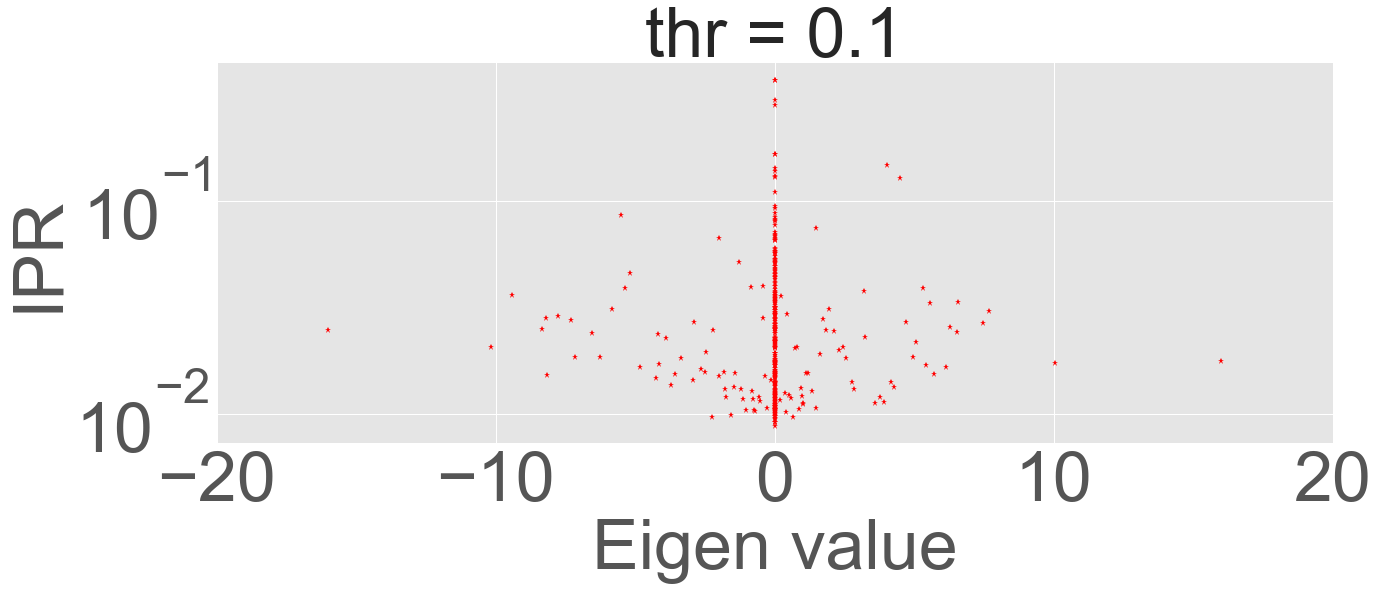

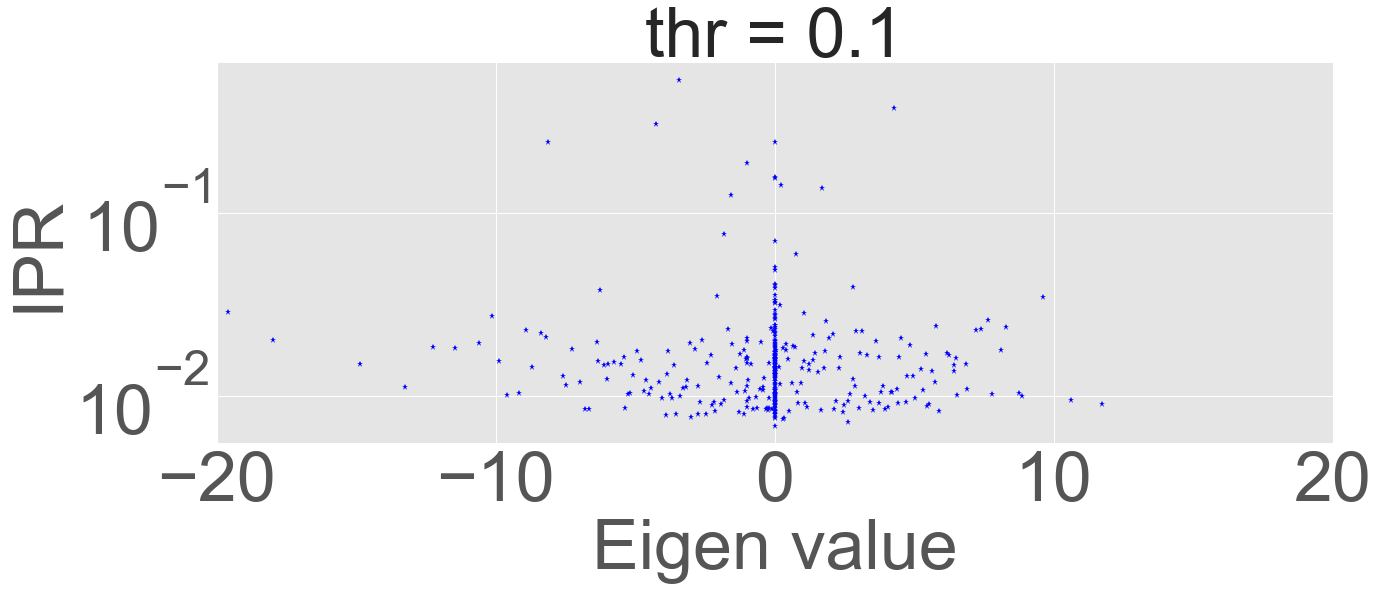

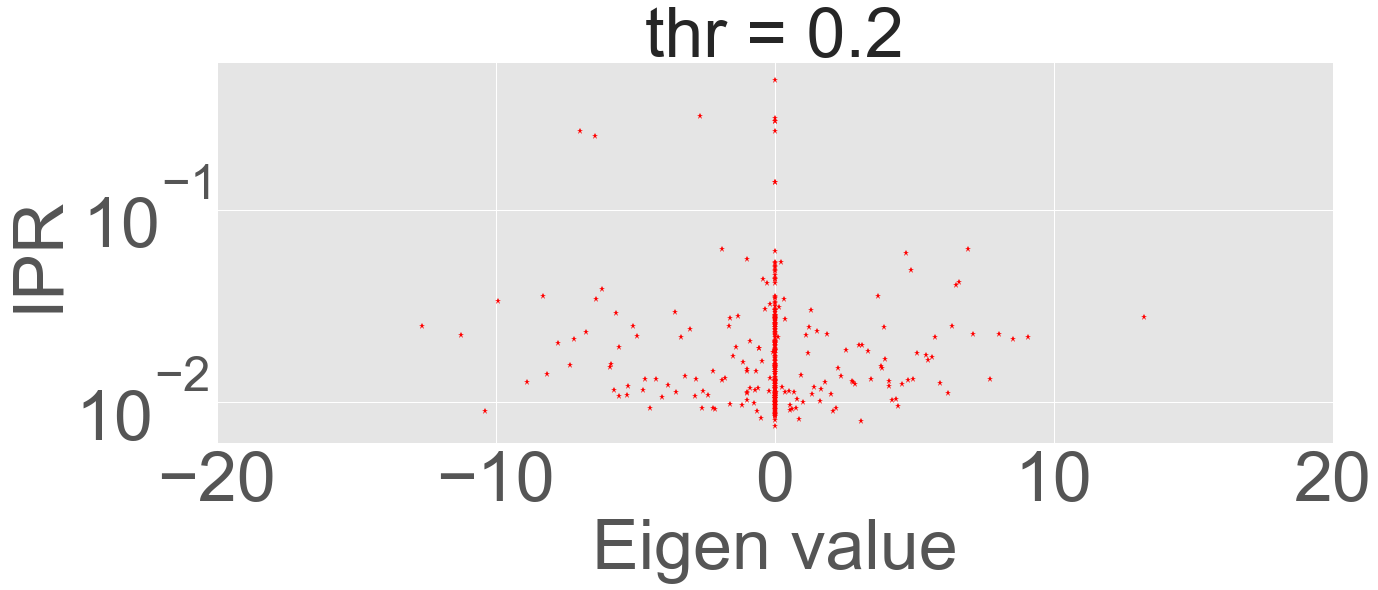

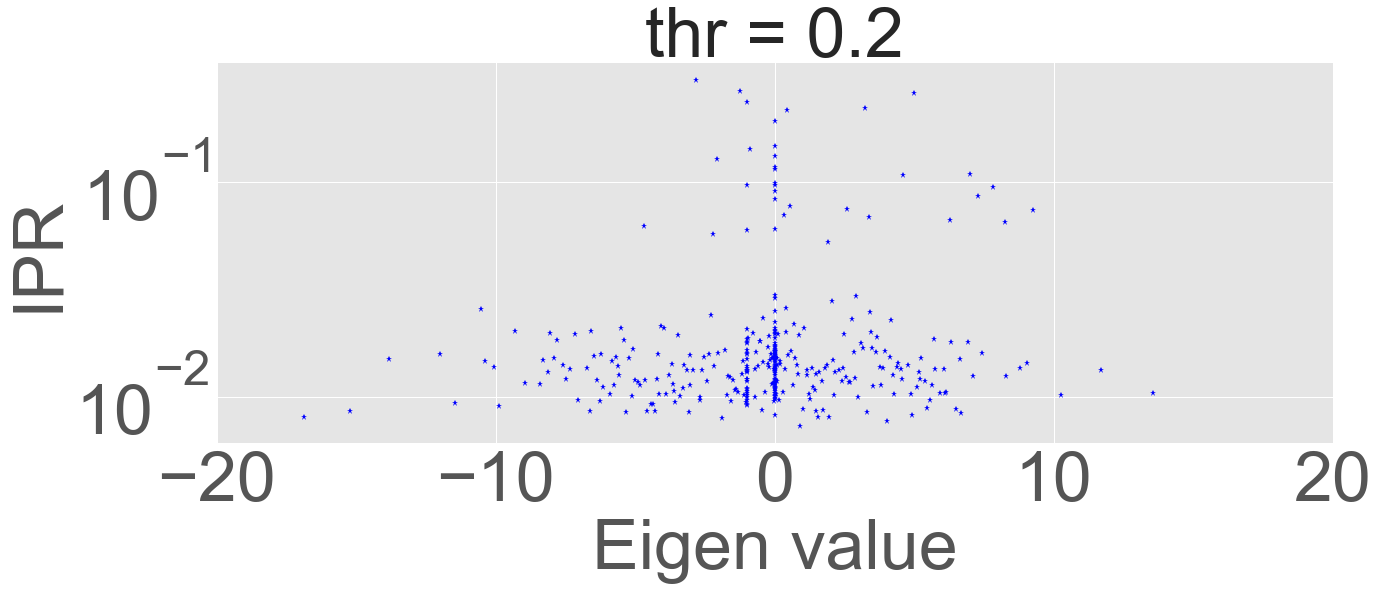

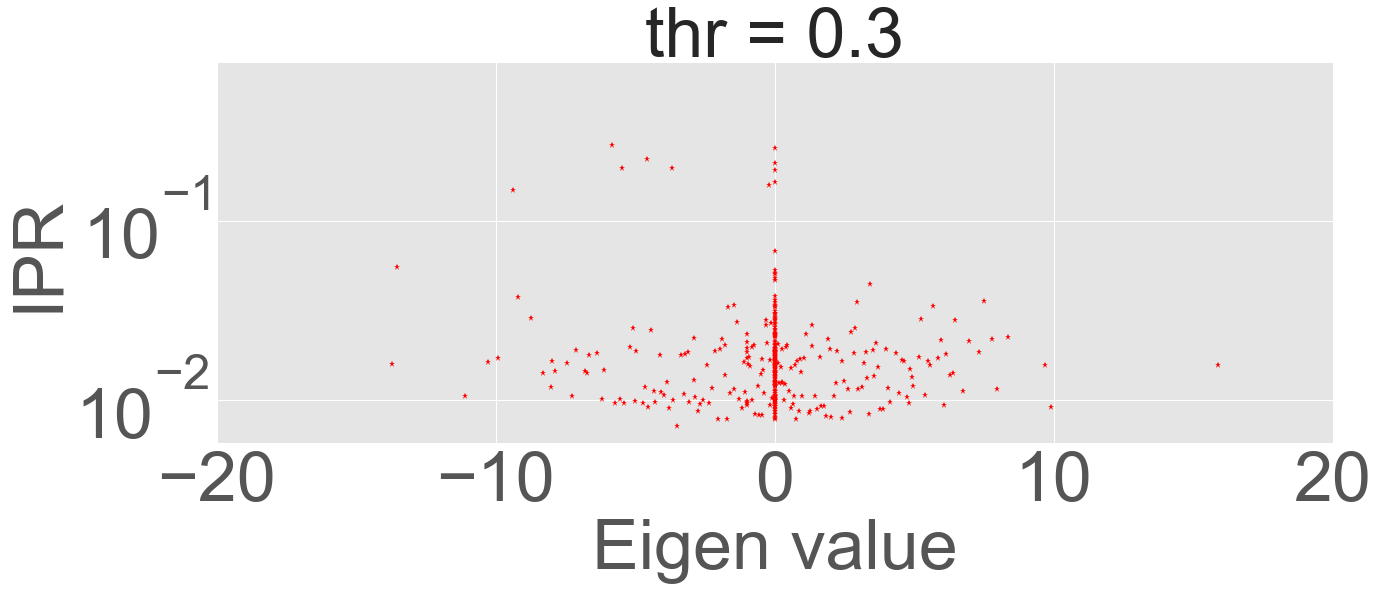

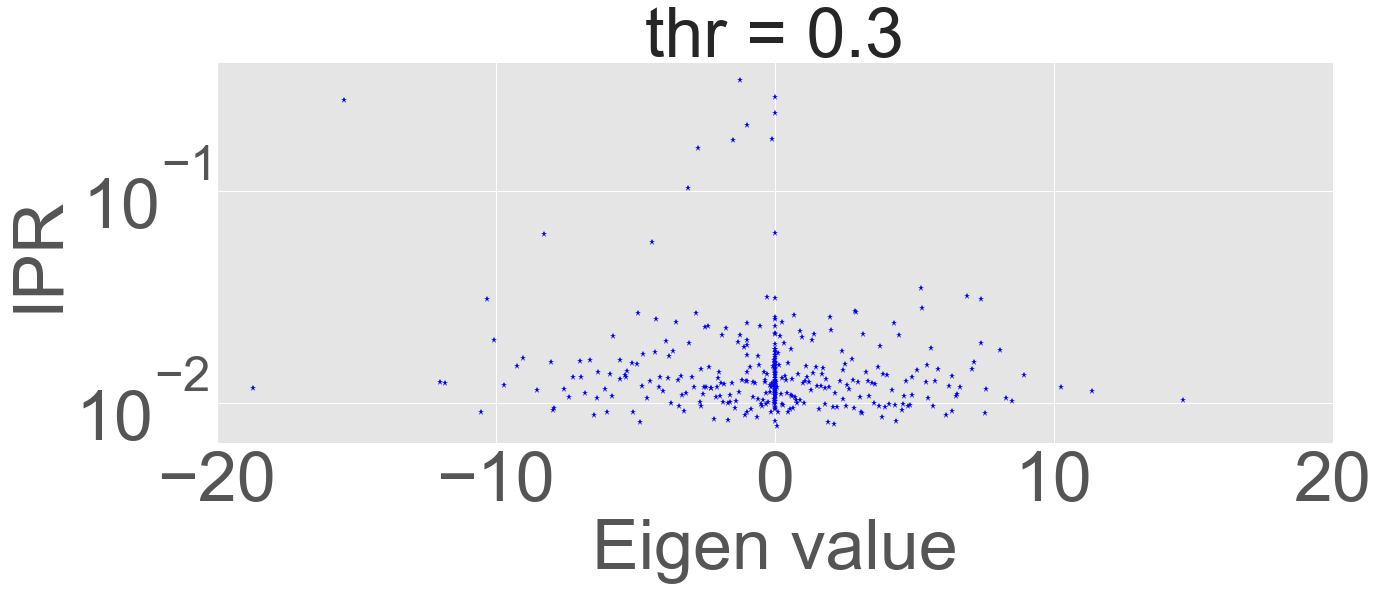

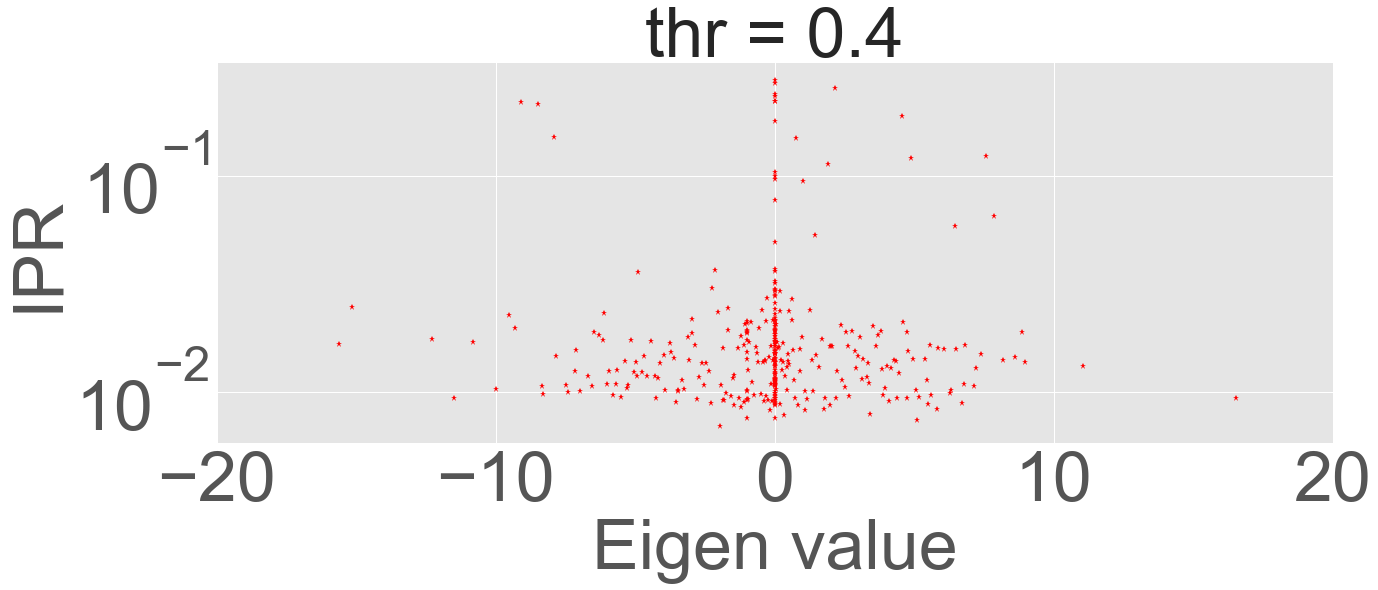

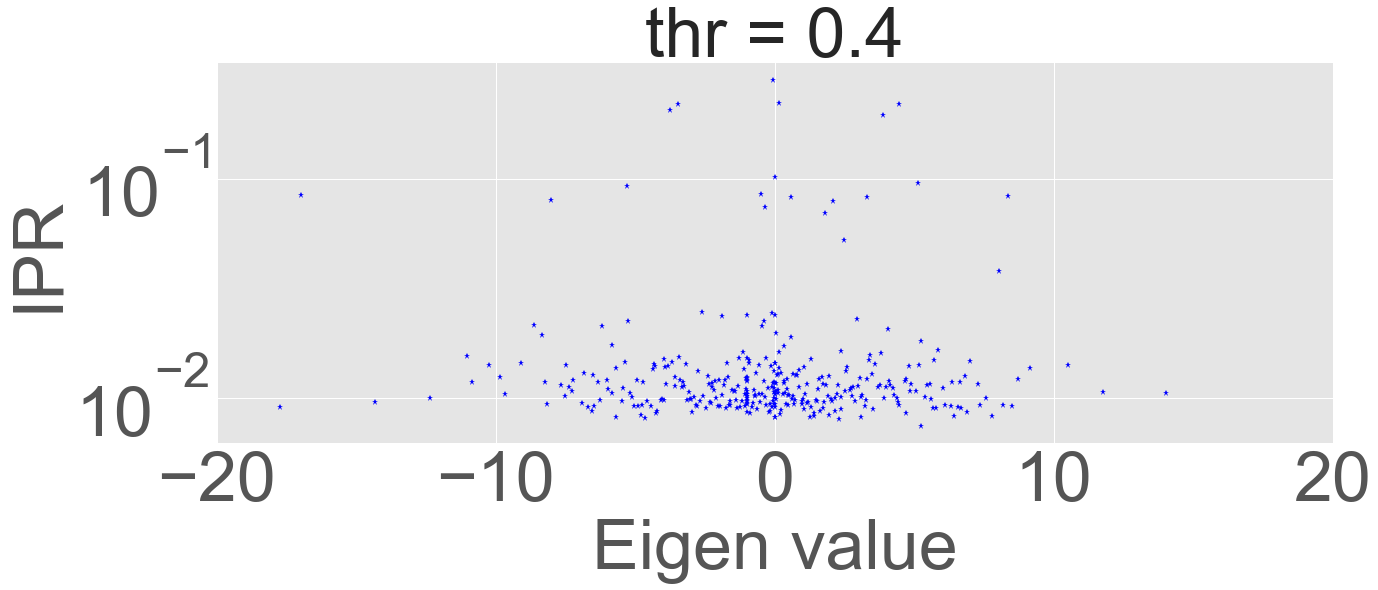

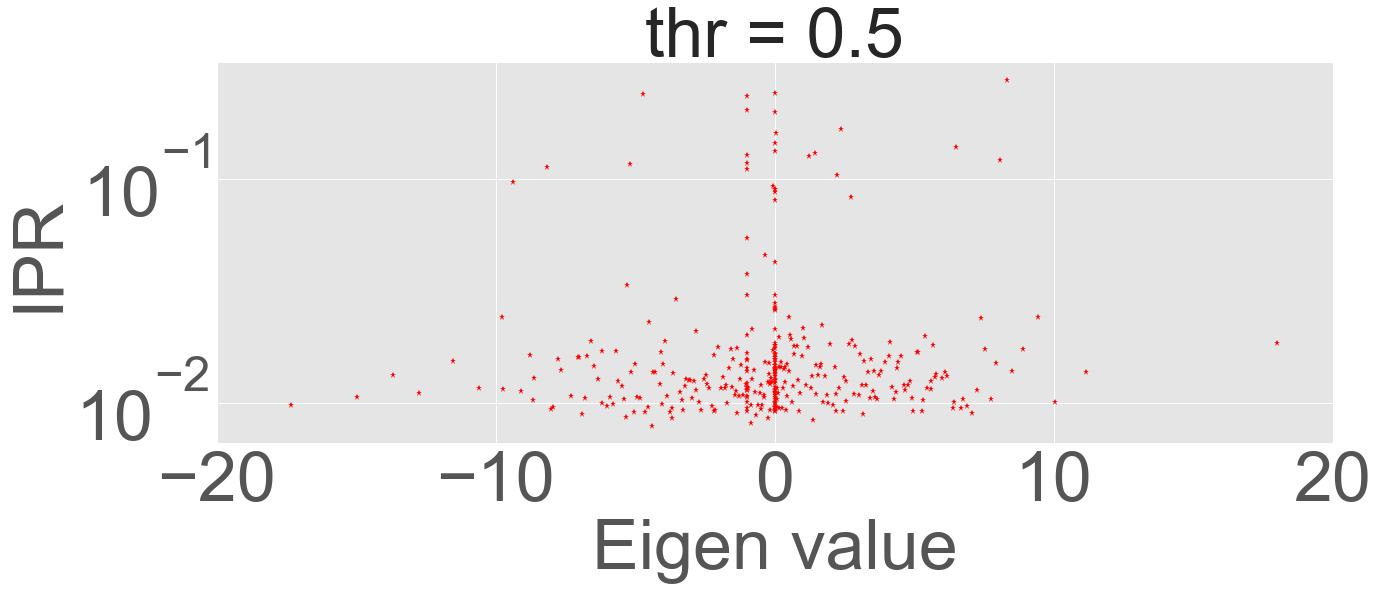

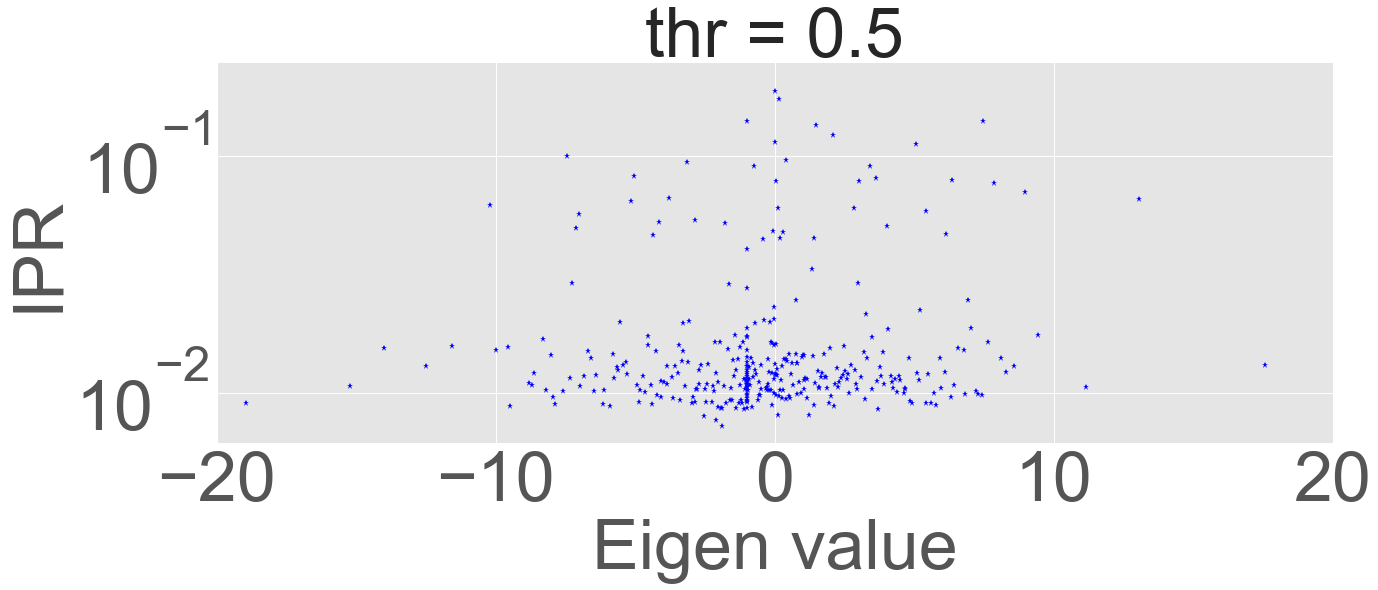

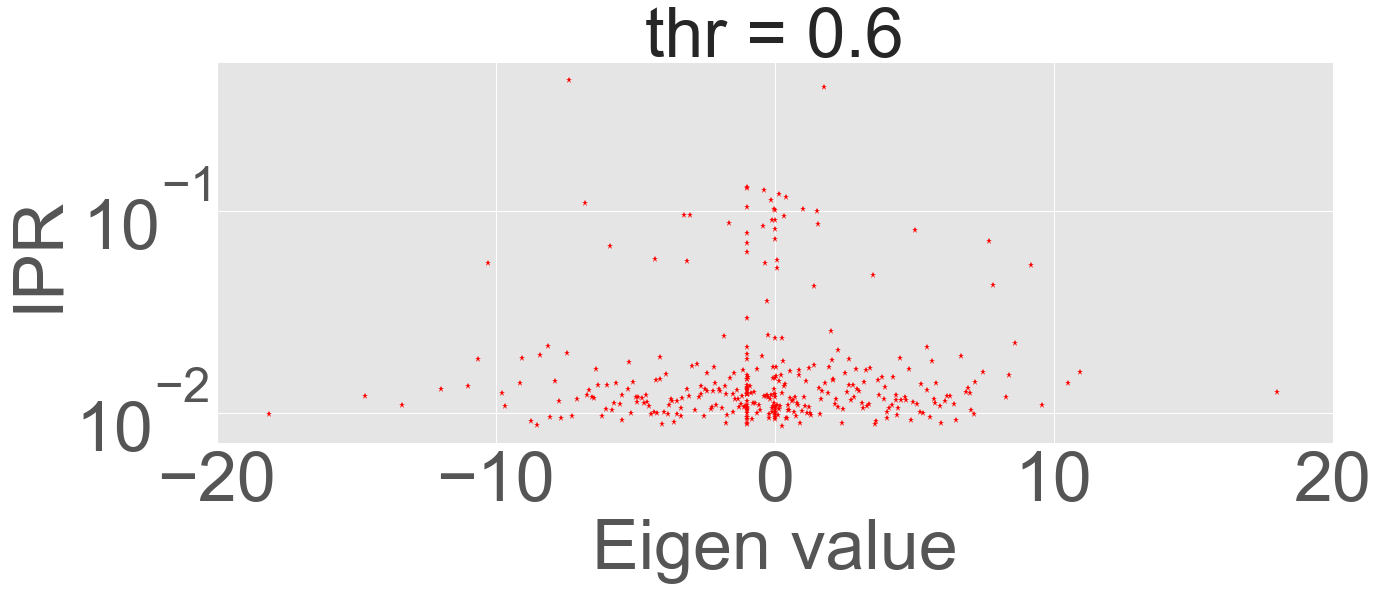

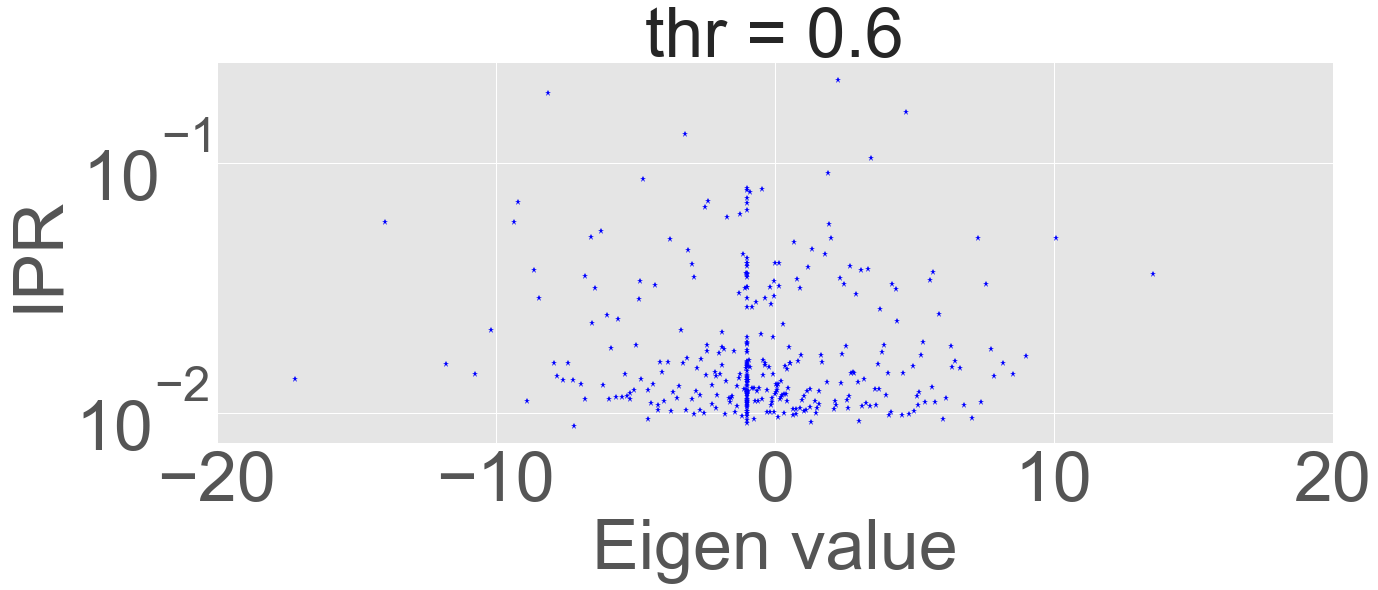

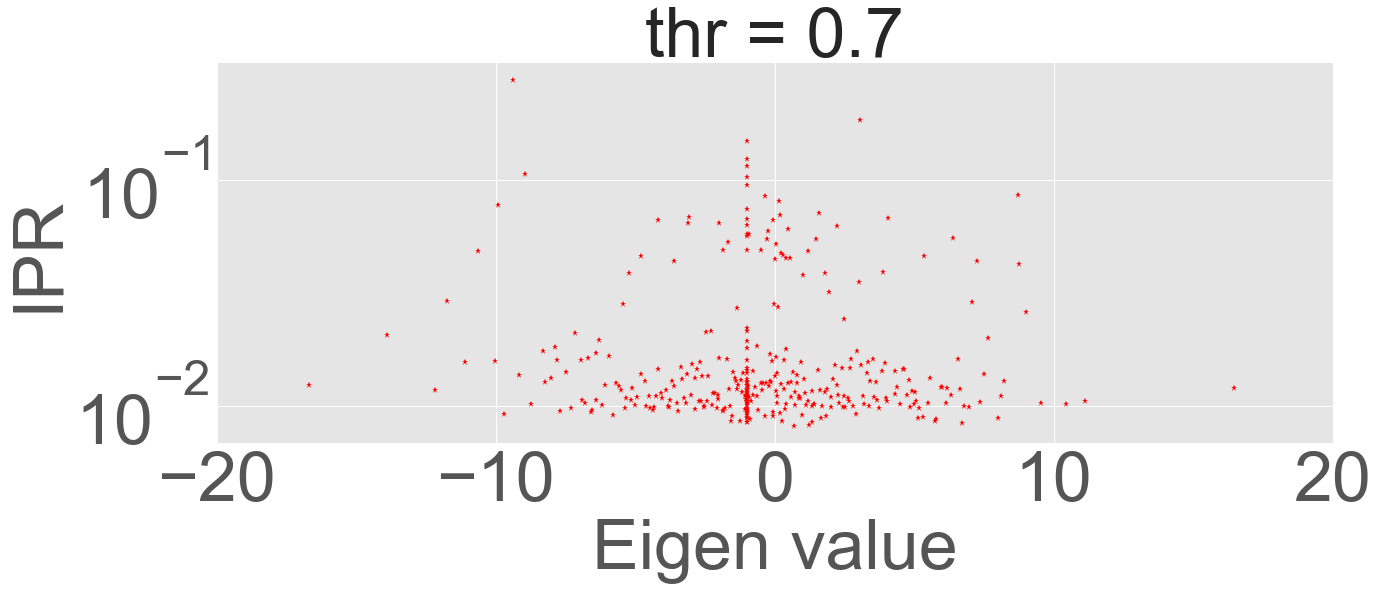

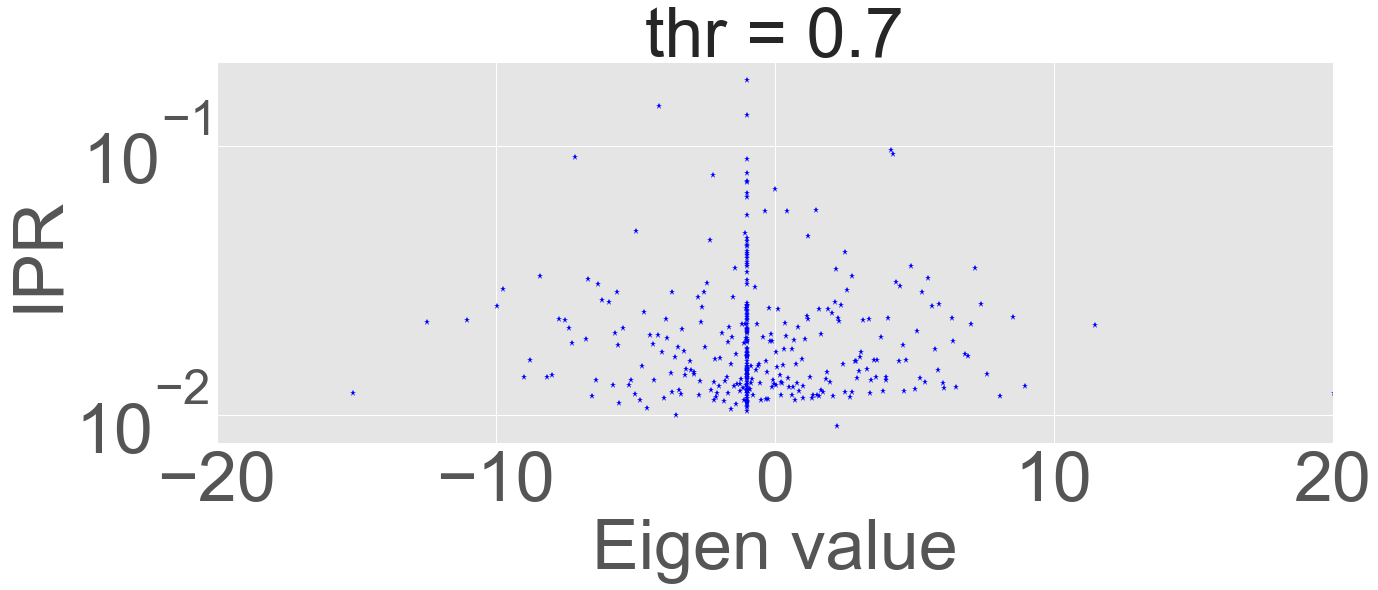

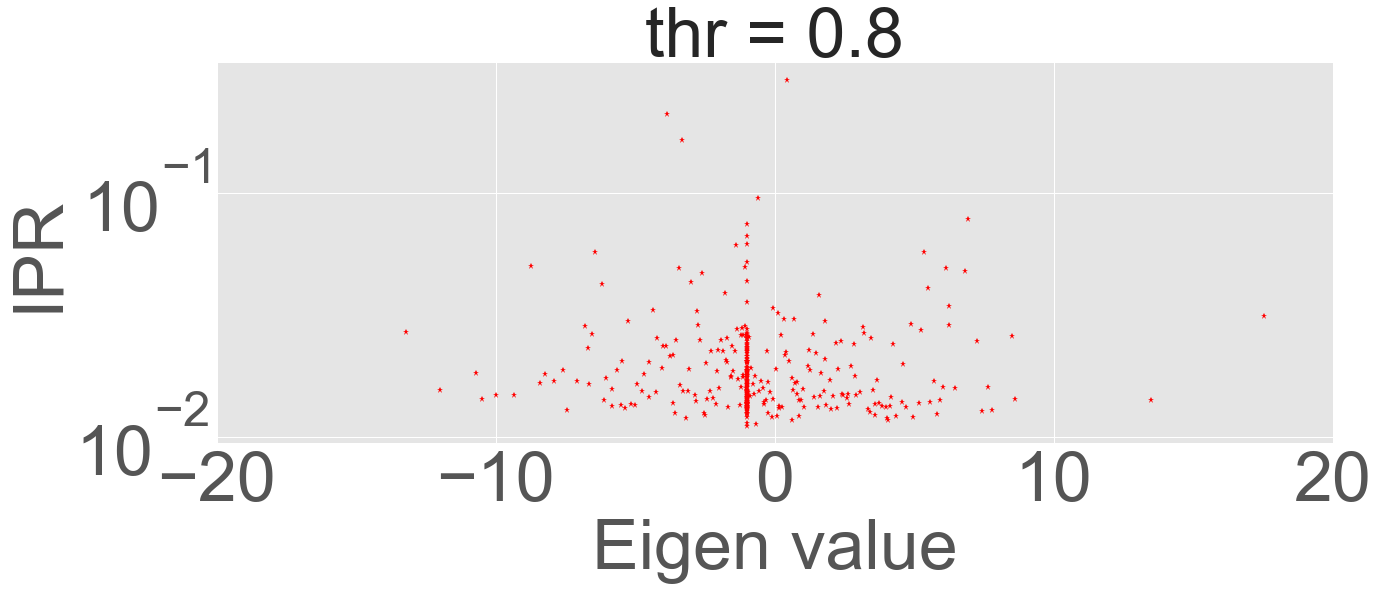

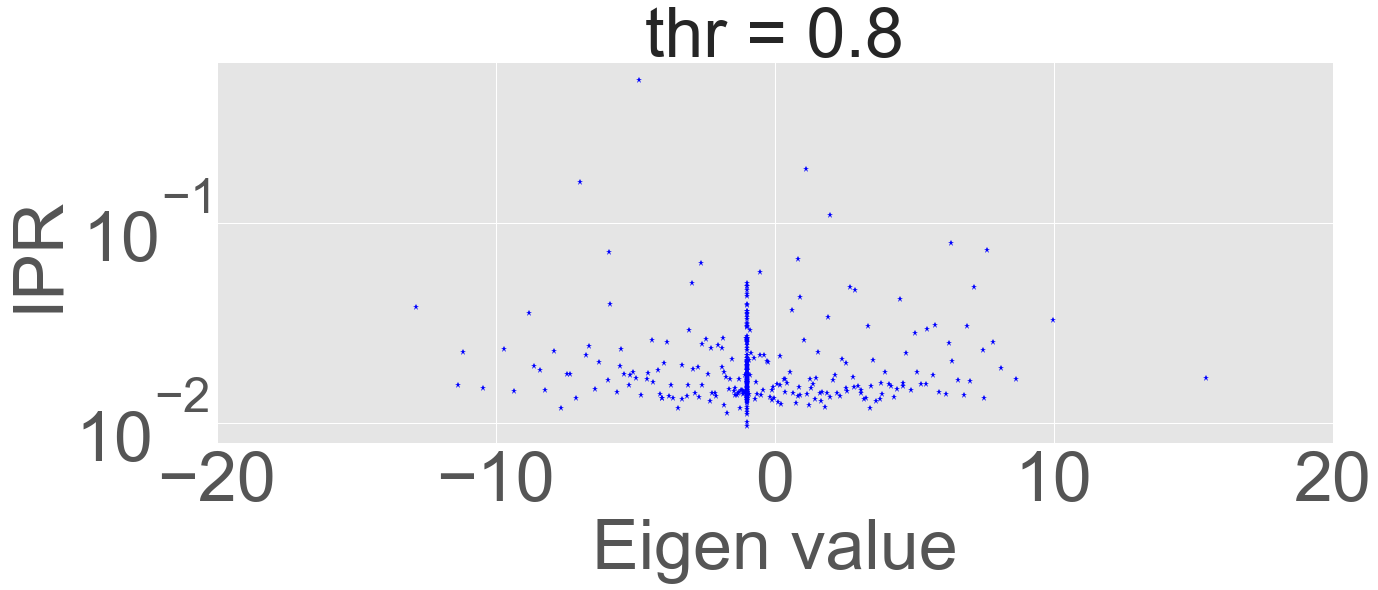

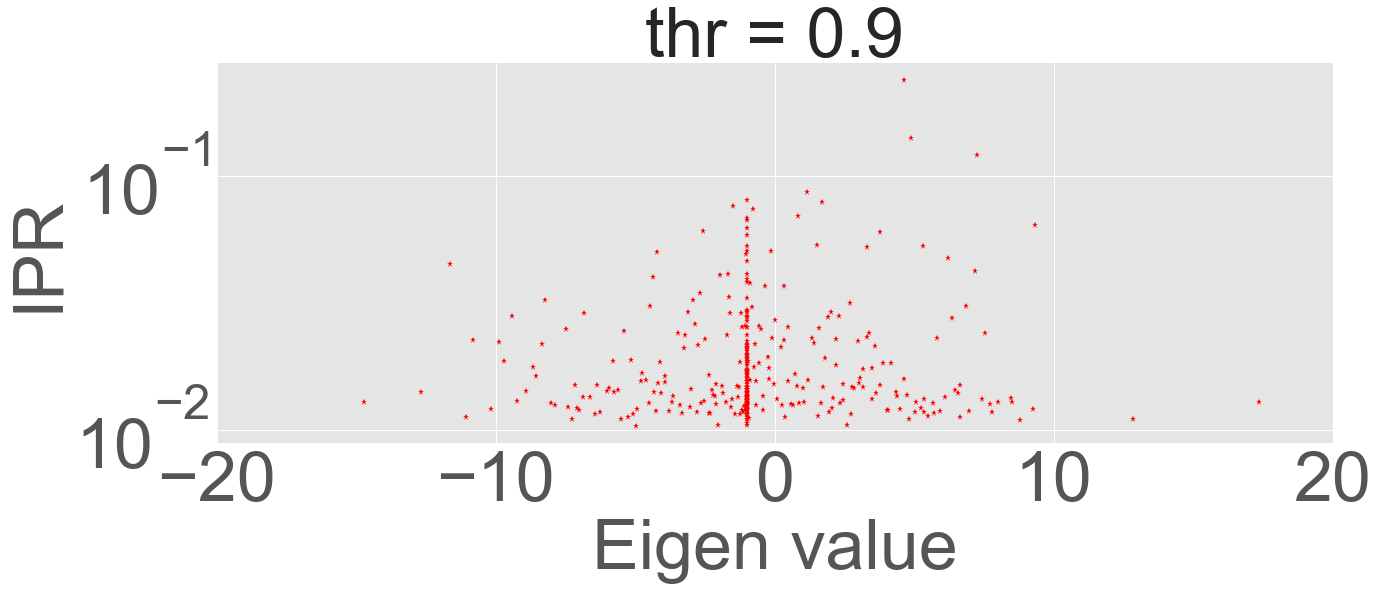

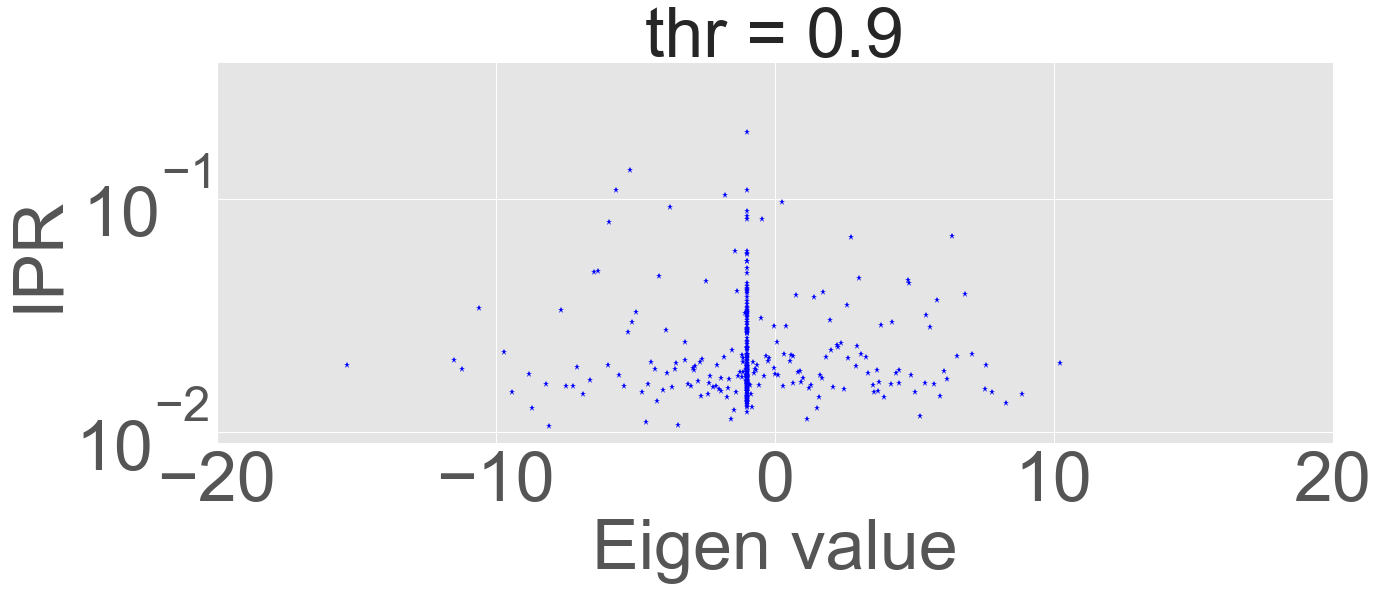

In [49]:
def plot_IPR_eigen(IPR, eigenvalues, id_group):
    ids = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[ids]
    IPR = IPR[ids]
    colors = ['red', 'blue']
    plt.plot(eigenvalues, IPR, '*', c = colors[id_group])
    ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlabel('Eigen value', size=fontsize)
    ax.set_ylabel('IPR', size=fontsize)
    ax.set_xlim([-20, 20])
    
def plot_IPR_eigen_sample(parenclitics, id_thr, thr_p, id_sample, fig):
    eigenvalues = parenclitics[id_thr]['eigenvalues'][id_sample]
    #print y[id_sample], np.sort(abs(eigenvalues))
    IPR = parenclitics[id_thr]['IPR'][id_sample]
    plt.figure(fig.number)
    plt.title("thr = " + str(thr_p), size=fontsize)
    plot_IPR_eigen(IPR, eigenvalues, y[id_sample])


id_thr = 6
figs = [plt.figure(figsize=(20, 7)), plt.figure(figsize=(20, 7))]
#for id_sample in config.params["id_sample"]:
    #print id_sample, '/', config.params["id_sample"].num_ticks
    #if id_sample > 11:
    #    break
    #plot_IPR_eigen_sample(parenclitics, id_sample, figs[y[id_sample]])
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, thr_p = thr_p, id_sample = 0, fig = plt.figure(figsize=(20, 7)))
    plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, thr_p = thr_p, id_sample = 5, fig = plt.figure(figsize=(20, 7)))

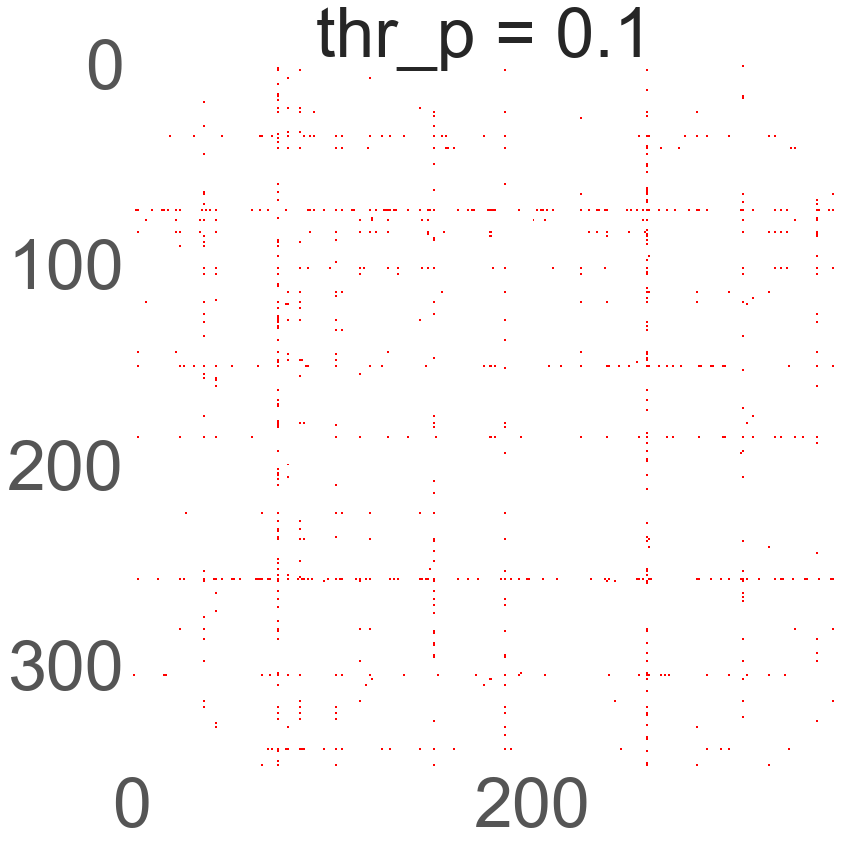

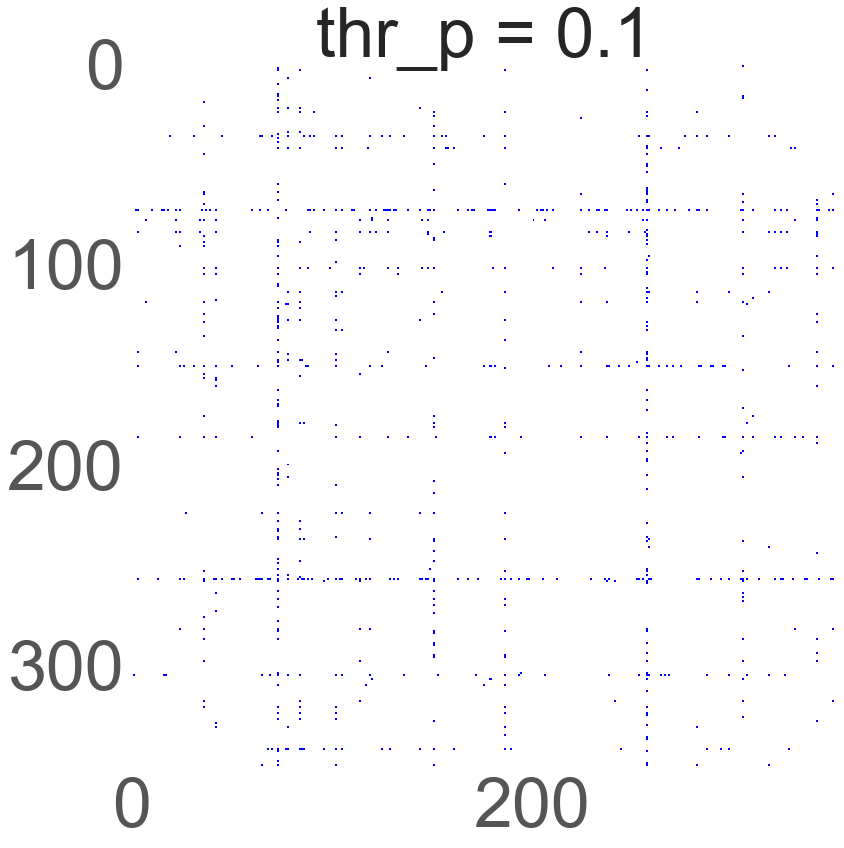

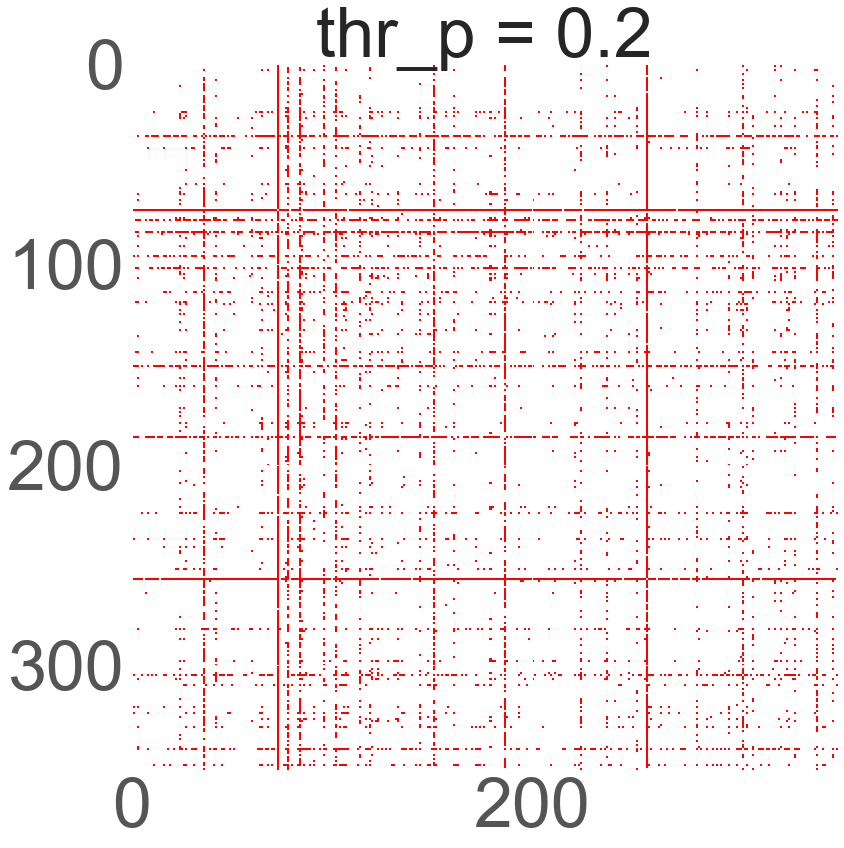

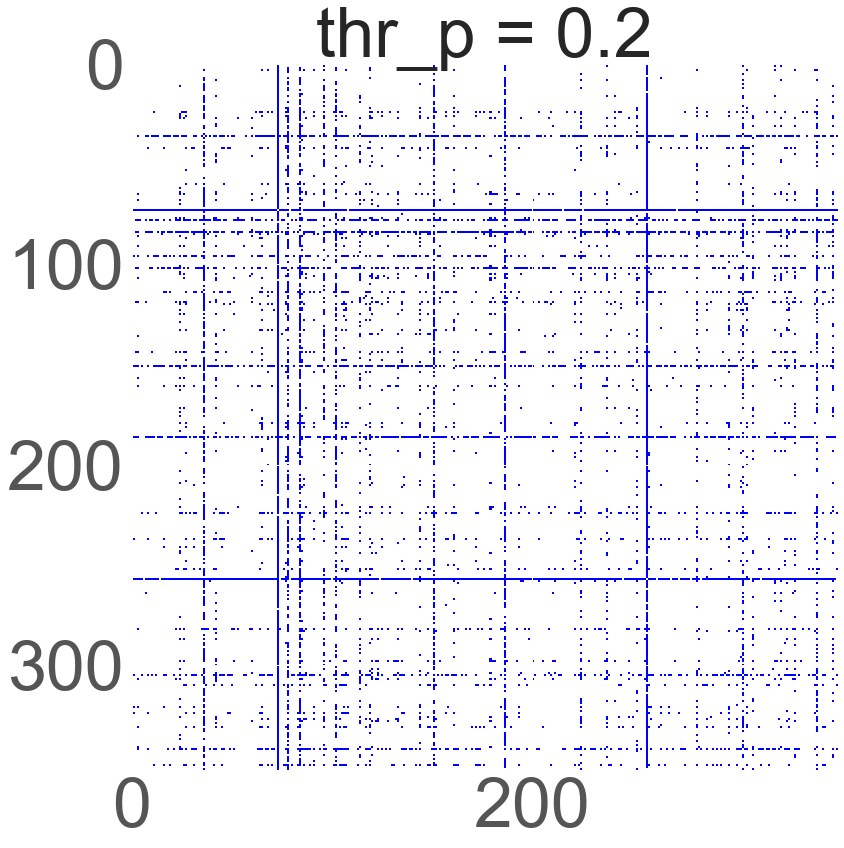

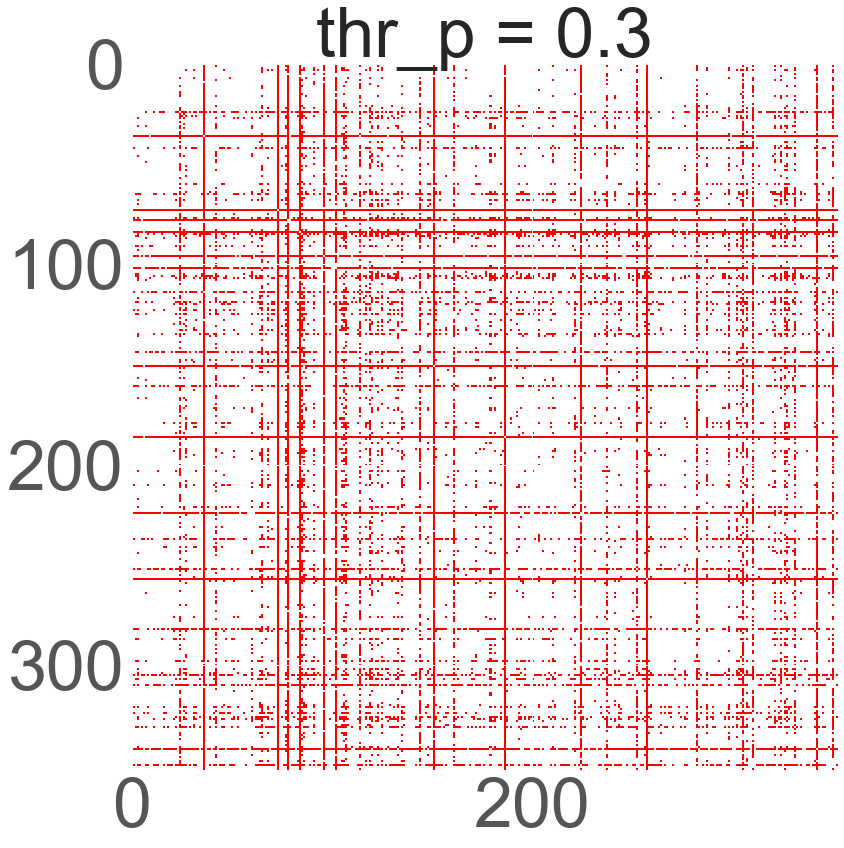

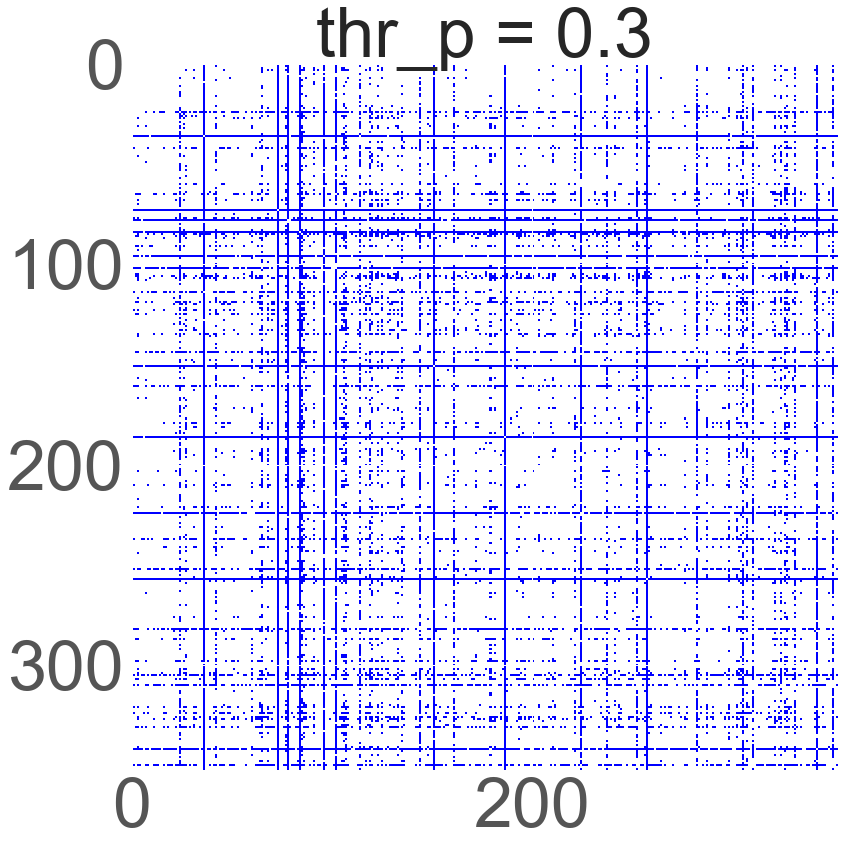

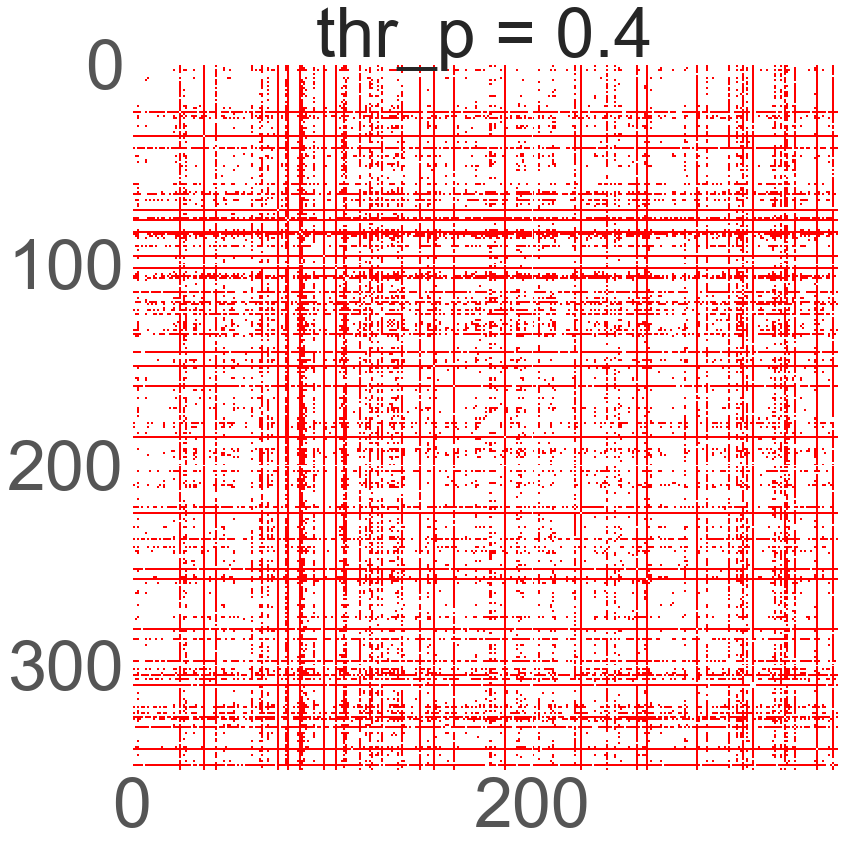

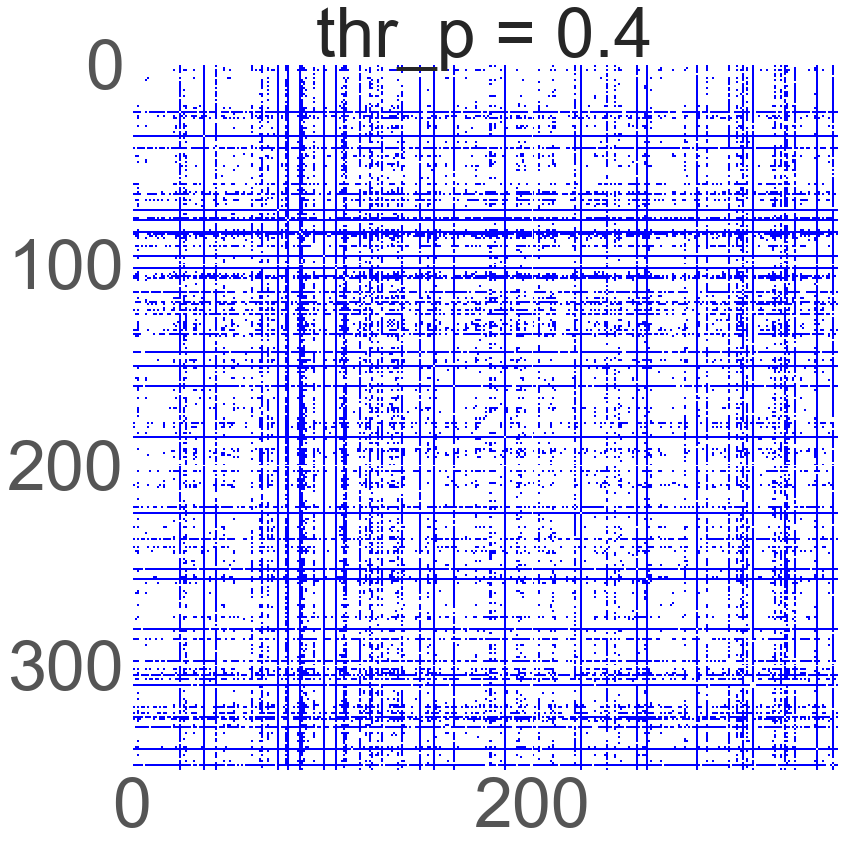

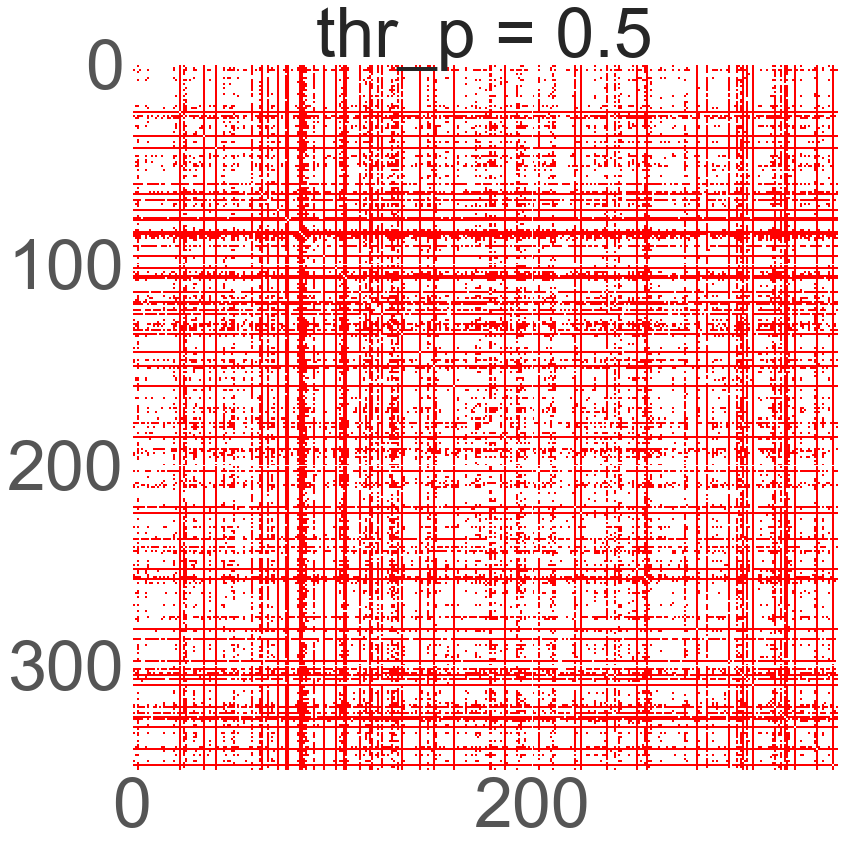

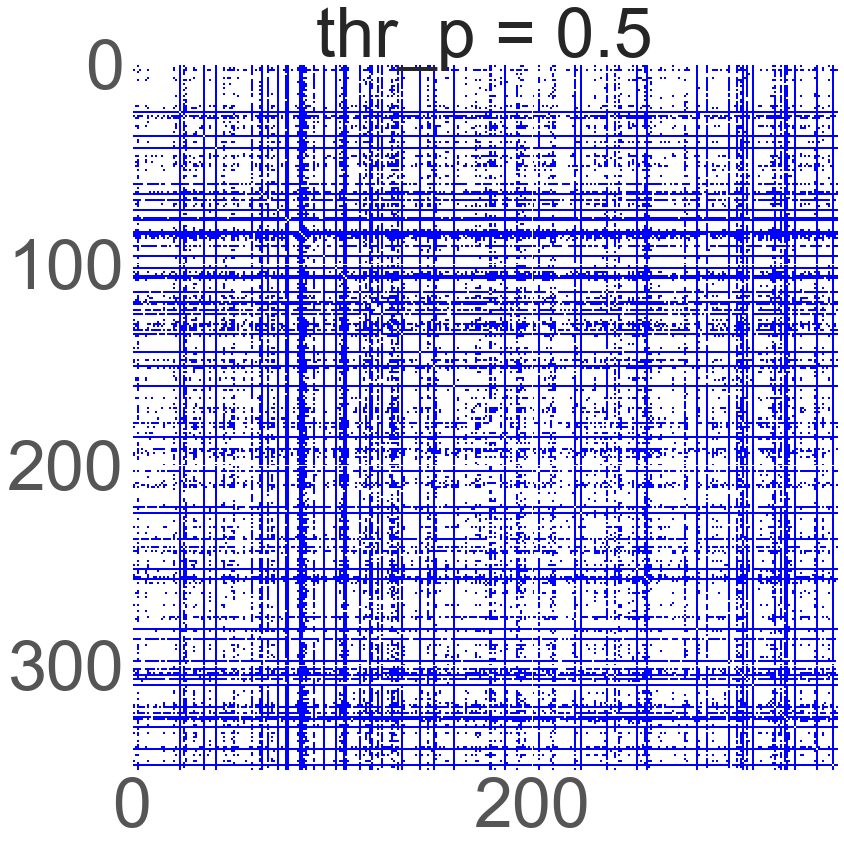

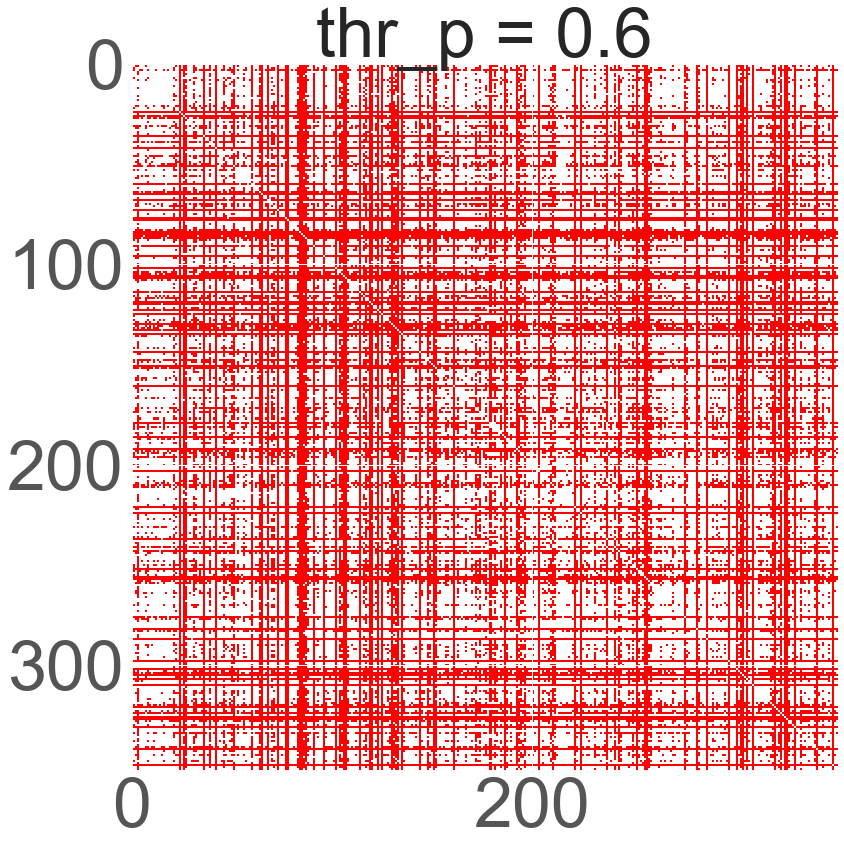

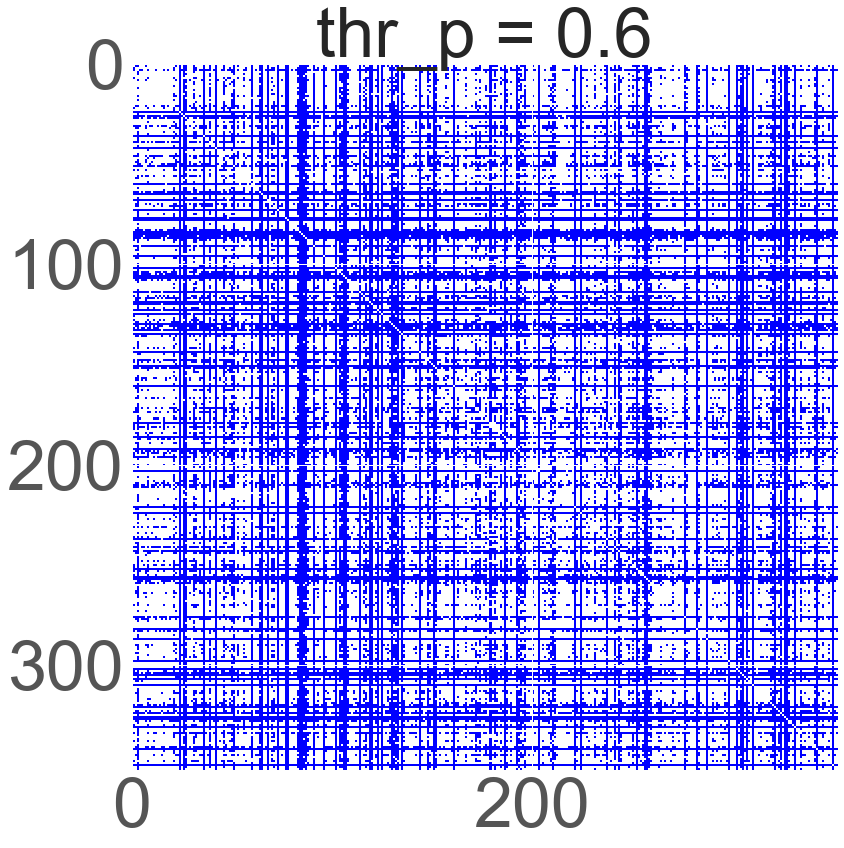

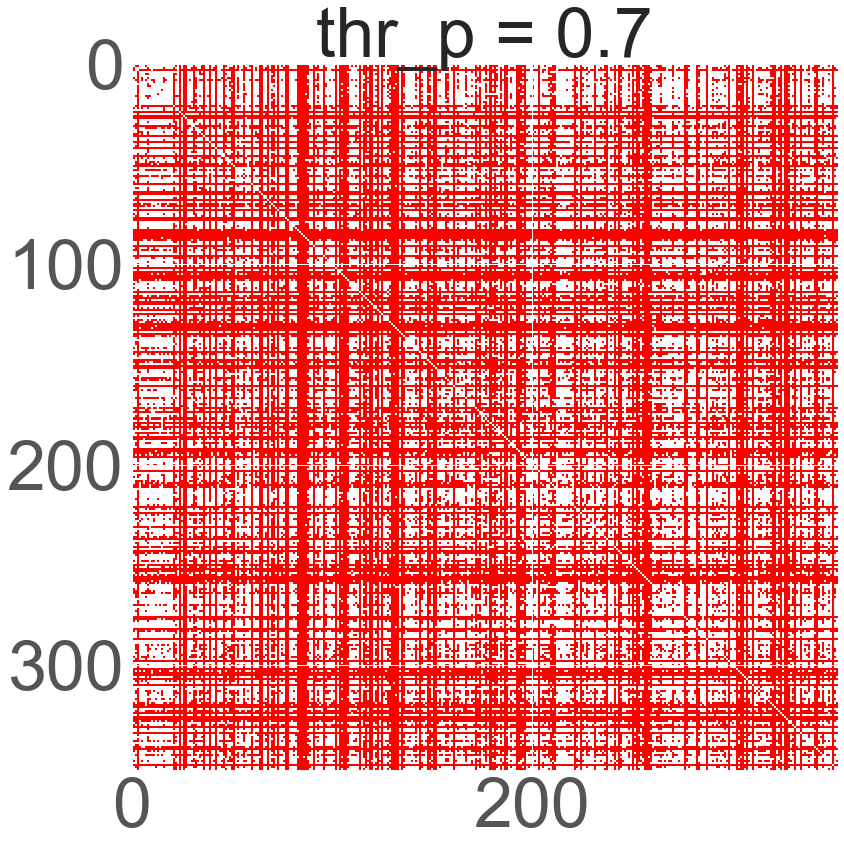

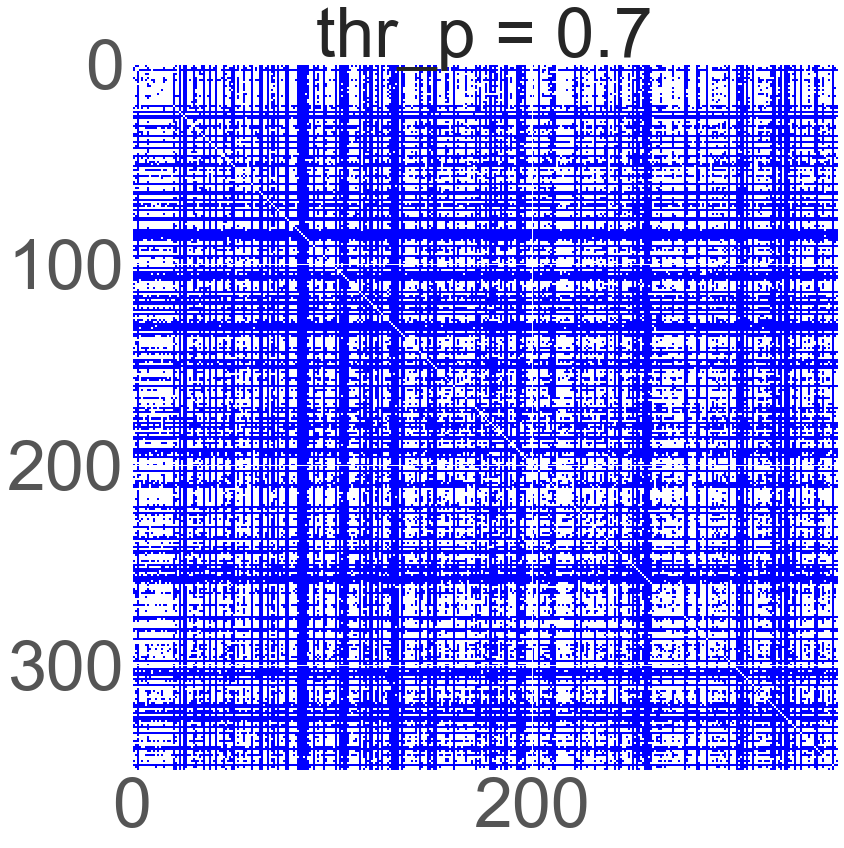

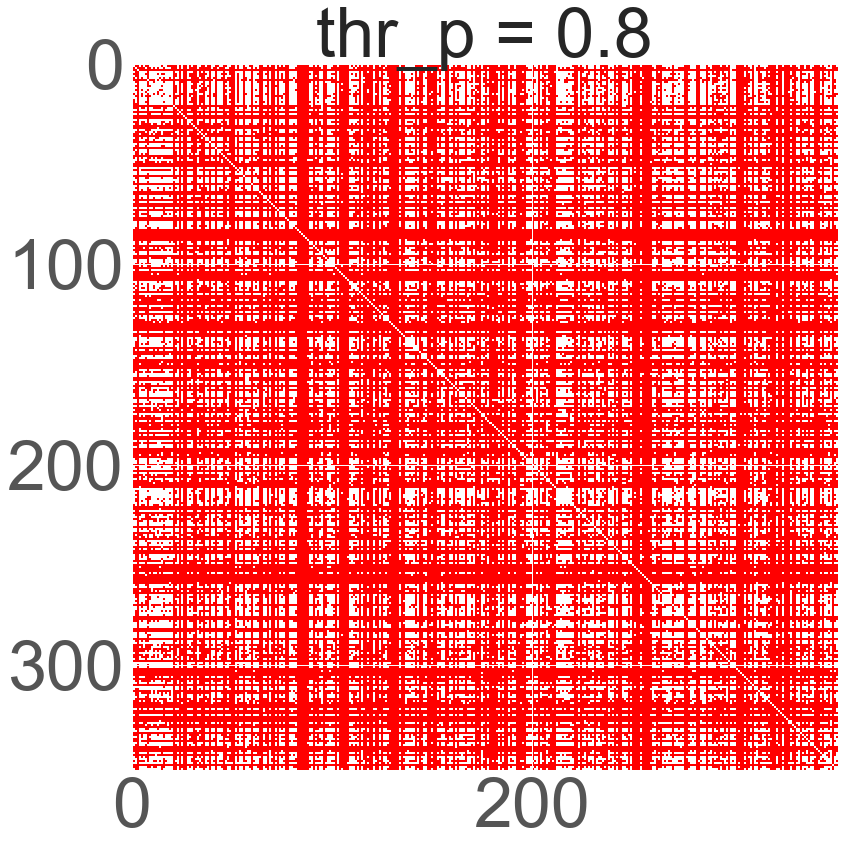

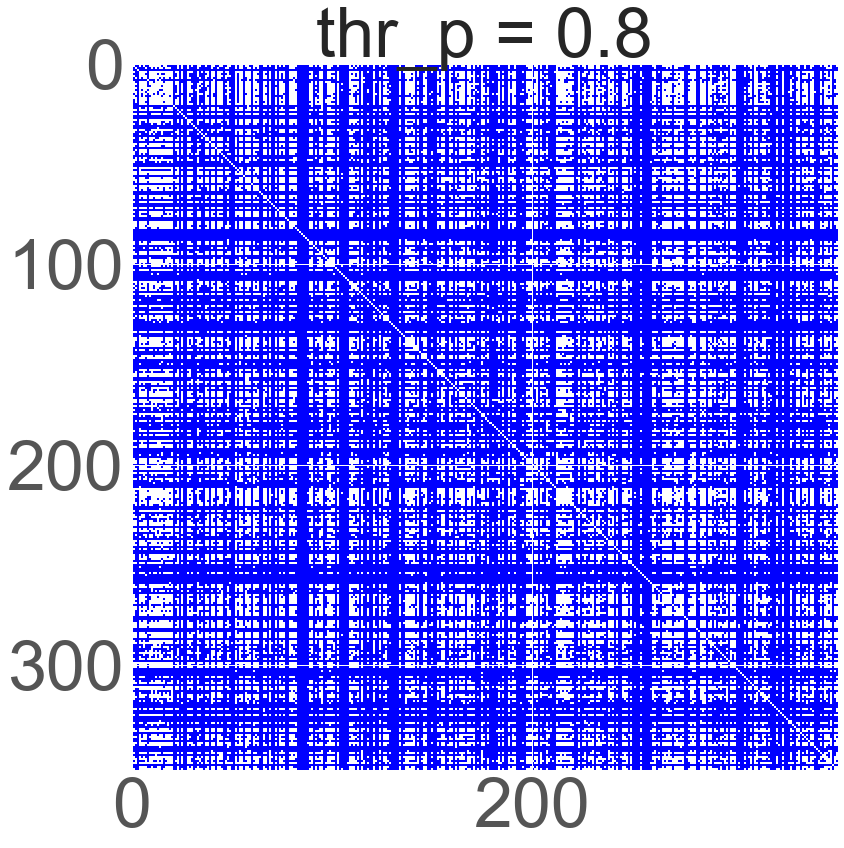

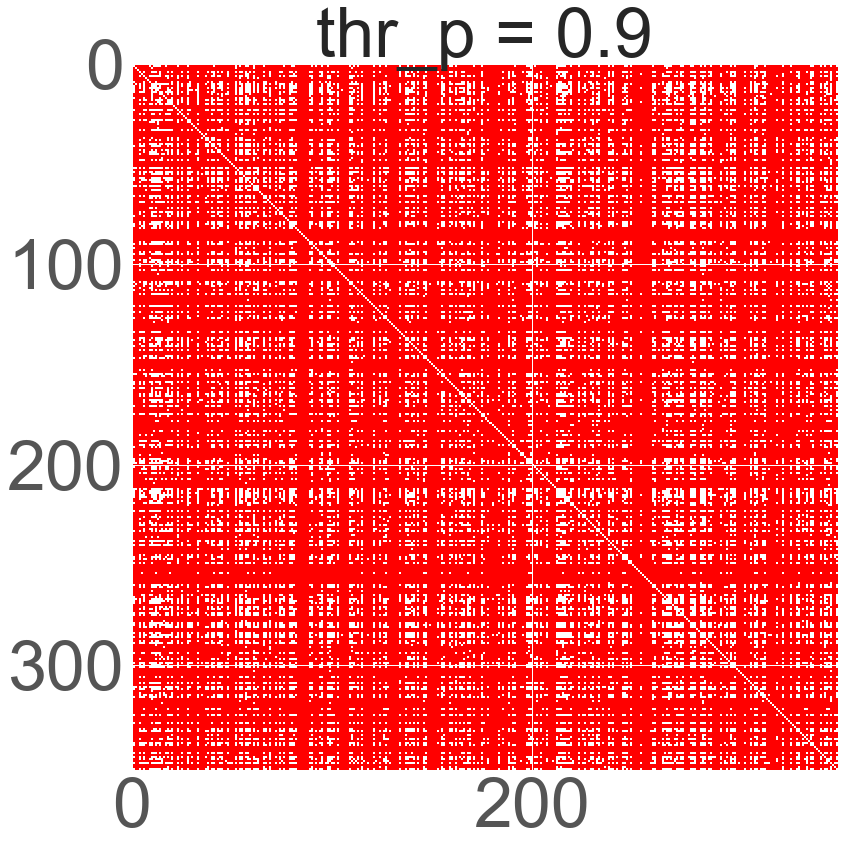

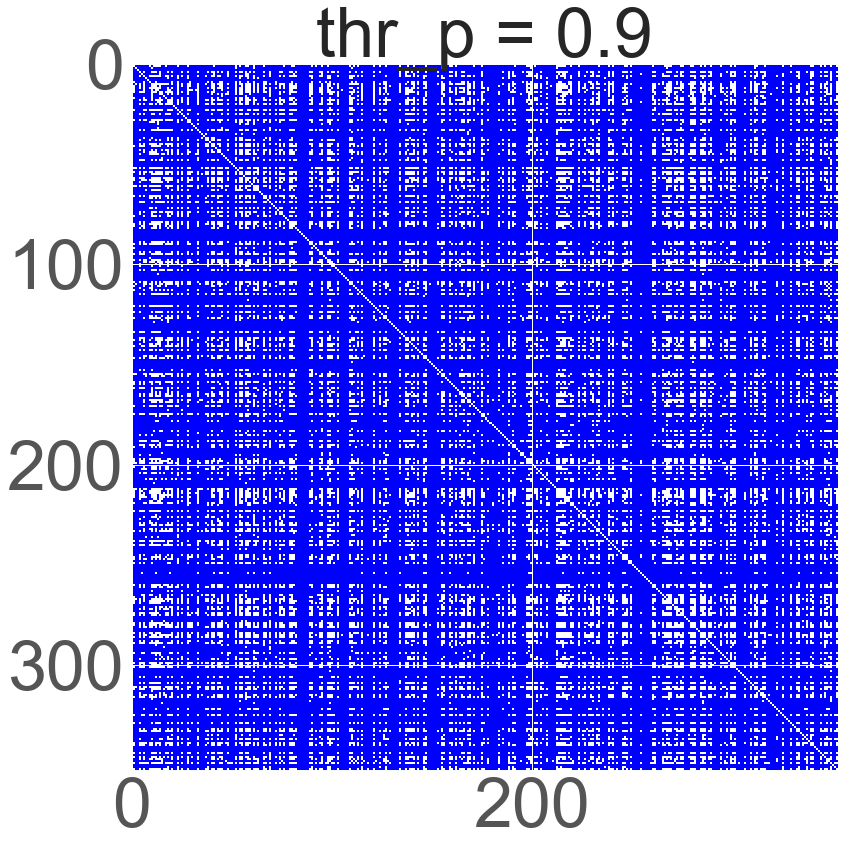

In [79]:
def load_graph(id_thr, id_sample):
    data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
    g = data['G']
    g = np.unpackbits(g, axis = 1)[:, :X.shape[1]].astype(np.bool)
    g = igraph.Graph.Weighted_Adjacency(g.tolist(), mode=igraph.ADJ_UNDIRECTED)
    return g

def plot_adjacency(g, title_name, id_group, fig = None):
    import matplotlib.colors
    if fig is None:
        fig = plt.figure(figsize = (13, 13))
    plt.figure(fig.number)
    colors = ['red', 'blue']
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", colors[id_group]])
    plt.title(title_name, size = fontsize)
    plt.imshow(g.get_adjacency().data, cmap = cmap)
    


for id_thr, thr_p in enumerate(config.params["thr_p"]):
    id_sample = 0
    g = load_graph(id_thr, id_sample)
    plot_adjacency(g, 'thr_p = ' + str(thr_p), y[id_sample])
    id_sample = 5
    g = load_graph(id_thr, id_sample)
    plot_adjacency(g, 'thr_p = ' + str(thr_p), y[id_sample])



In [8]:


for id_thr, thr_p in enumerate(config.params["thr_p"]):
    if id_thr != 1:
        continue
    print thr_p
    degrees = [np.array([])] * 5
    parenclitics_degrees = parenclitics[id_thr]['degrees']
    for id_sample in config.params["id_sample"]:
        print id_sample, '/', config.params["id_sample"].num_ticks
        #print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
        '''
        data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
        g = data['G']
        g = np.unpackbits(g, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
        g = np.logical_or(g, g.T)
        degrees = g.sum(axis = 0)
        '''
        cur_degrees = parenclitics_degrees[id_sample]
        if id_sample in config.params["mongoloids_mask"].value:
            degrees[0] = np.concatenate([degrees[0], degrees])
            
        if id_sample in config.params["siblings_mask"].value:
            degrees[1] = np.concatenate([degrees[1], degrees])
            
        if id_sample in config.params["mothers_mask"].value:
            degrees[2] = np.concatenate([degrees[2], degrees])
        
    #plot_hist_degree(degrees_mongoloids, degrees_siblings, degrees_mothers)

0.2
0 / 71


KeyError: 'mongoloids_mask'

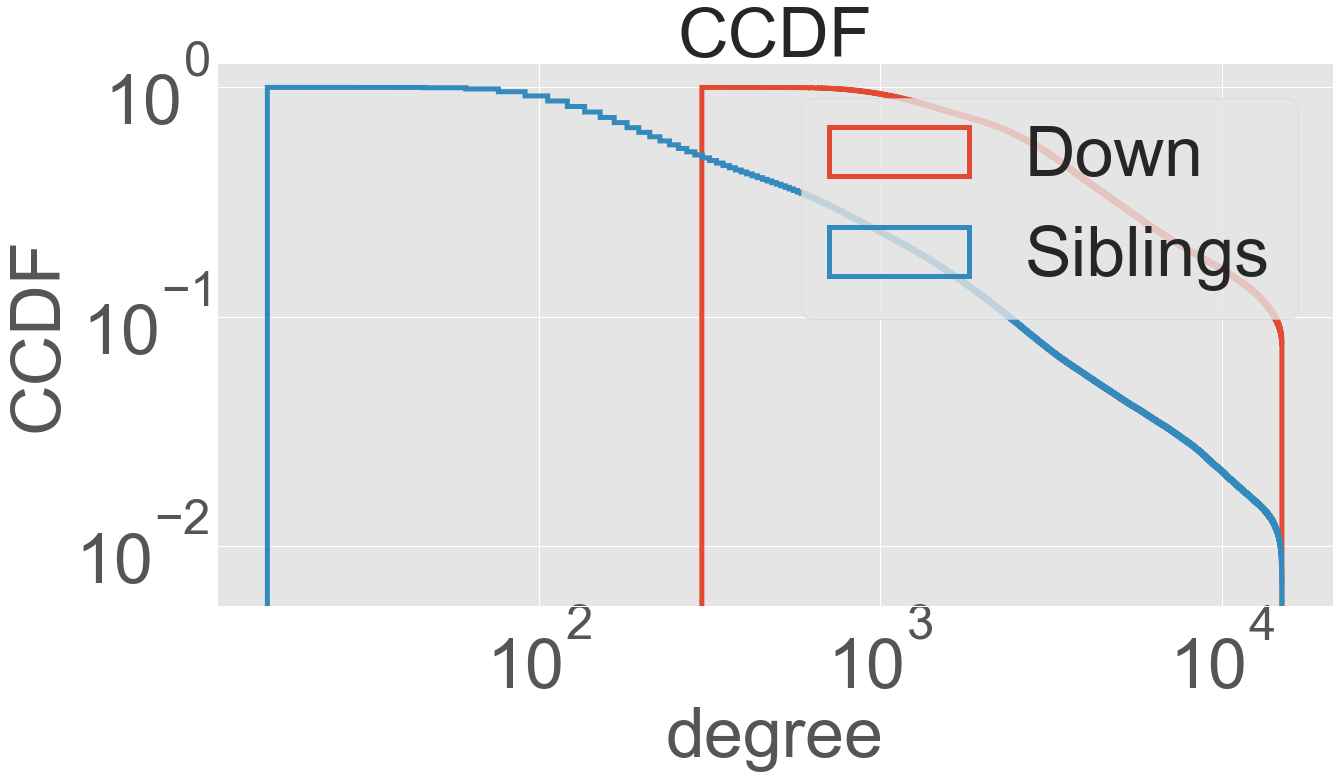

In [10]:
def plot_hist_degree(degrees_mongoloids, degrees_siblings, degrees_mothers):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca()
    plt.hist(degrees_mongoloids, density=True, bins = 1000, cumulative = -1, histtype = 'step', linewidth=5)
    plt.hist(degrees_siblings,density=True, bins = 1000, cumulative = -1, histtype = 'step', linewidth=5)
    #plt.hist(degrees_mothers, density=True, log=True, bins = 100, cumulative = -1)
    plt.title('CCDF', size=fontsize)
    plt.legend(['Down', 'Siblings', 'Mothers'])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('degree', size=fontsize)
    ax.set_ylabel('CCDF', size=fontsize)

plot_hist_degree(degrees_mongoloids, degrees_siblings, degrees_mothers)

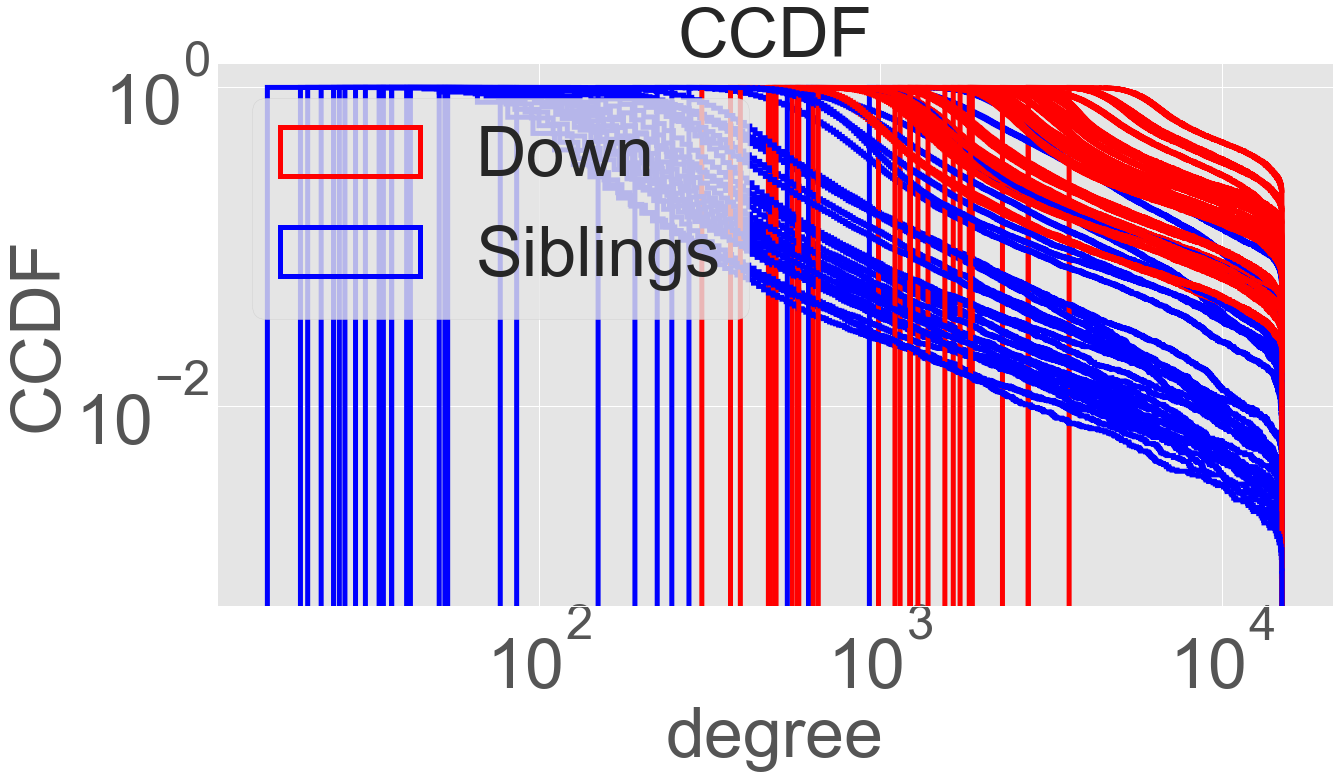

In [11]:
def plot_hist_degree(degrees_mongoloids, degrees_siblings, degrees_mothers):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca()
    num_genes = 15024
    for i in range(29):
        plt.hist(degrees_mongoloids[i * num_genes:(i + 1) * num_genes], density=True, bins = 1000, cumulative = -1, histtype = 'step', linewidth=5, color='r')
        plt.hist(degrees_siblings[i * num_genes:(i + 1) * num_genes],density=True, bins = 1000, cumulative = -1, histtype = 'step', linewidth=5, color='b')
    plt.title('CCDF', size=fontsize)
    ax.set_yscale('log')
    plt.legend(['Down', 'Siblings'])
    ax.set_xscale('log')
    ax.set_xlabel('degree', size=fontsize)
    ax.set_ylabel('CCDF', size=fontsize)

plot_hist_degree(degrees_mongoloids, degrees_siblings, degrees_mothers)

In [34]:
len(degrees_mongoloids) / 29

15024

In [27]:
num_genes = X.shape[1]
degrees_mongoloids_mean = np.zeros((num_genes, ), dtype = np.float32)
degrees_siblings_mean = np.zeros((num_genes, ), dtype = np.float32)
for i in range(29):
    degrees_mongoloids_mean += degrees_mongoloids[i * num_genes:(i + 1) * num_genes]
    degrees_siblings_mean += degrees_siblings[i * num_genes:(i + 1) * num_genes]

degrees_mongoloids_mean /= 29
degrees_siblings_mean /= 29

ntop_degree = 20
vertices = np.argsort(degrees_mongoloids_mean)[-ntop_degree:]
print genes_names[vertices]

(15024L,) 15024 (435696L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
(15024L,)
['SULT1A4' 'GIYD2' 'LRRC24' 'GPAA1' 'ABCB8' 'ZNF233' 'BCL9L' 'KIF13A'
 'TMEM204' 'PTCH1' 'KHK' 'GEMIN7' 'PABPN1' 'CCDC60' 'GJC2' 'SLURP1'
 'GPR75' 'HOXA2' 'LOC100302652' 'RUNX1']


0.6
0 / 87
(189L, 2L)
0 [0]


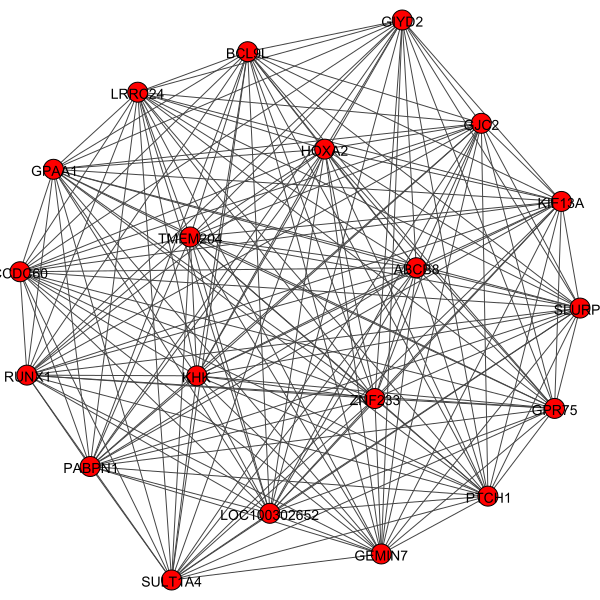

1 / 87
(189L, 2L)
1 [0]


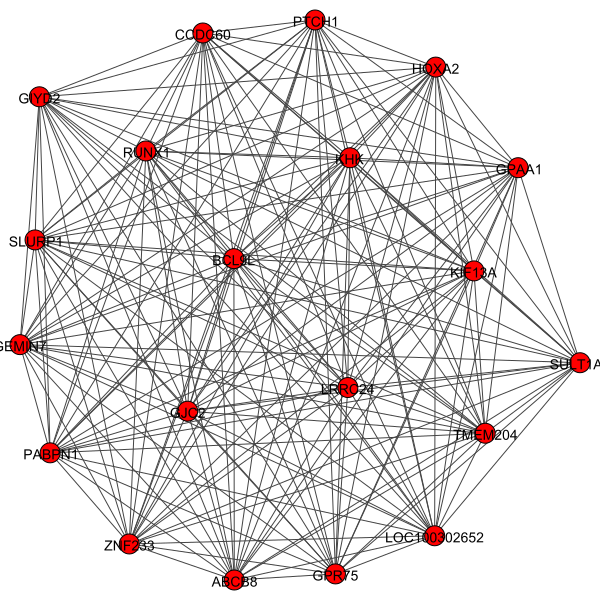

2 / 87
(189L, 2L)
2 [0]


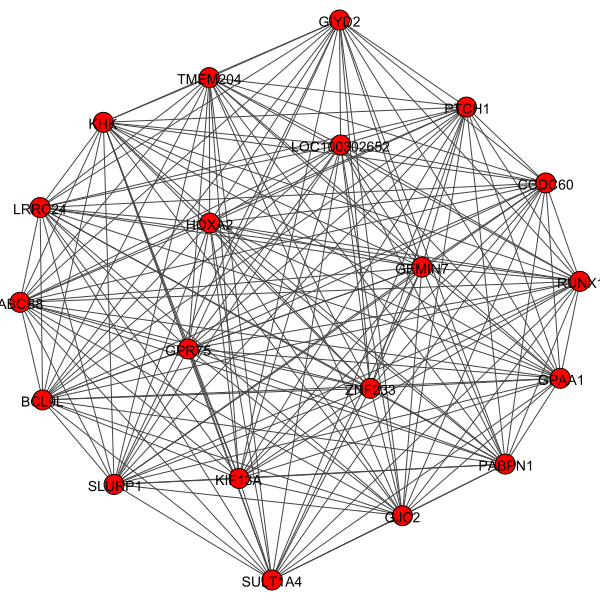

3 / 87
(189L, 2L)
3 [0]


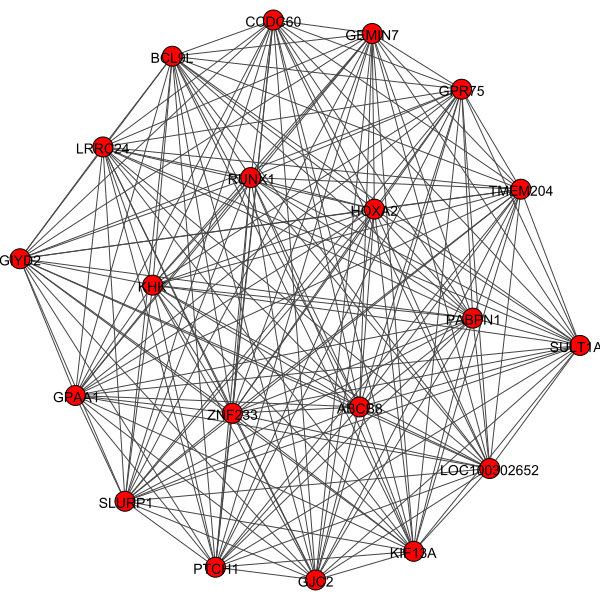

4 / 87
(189L, 2L)
4 [0]


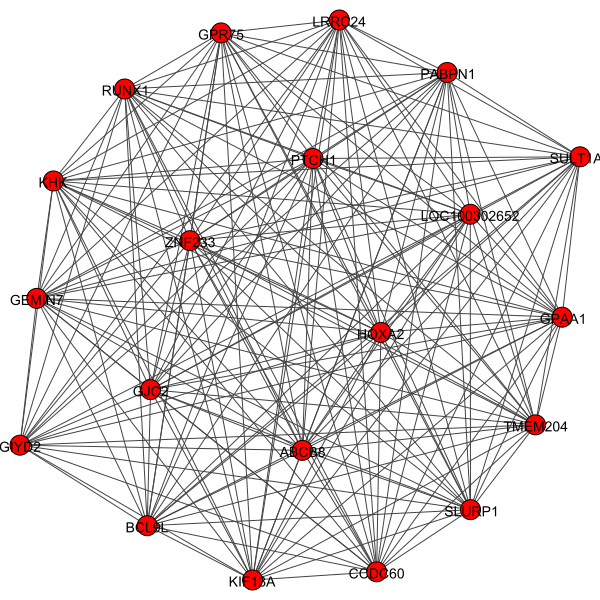

5 / 87
(189L, 2L)
5 [0]


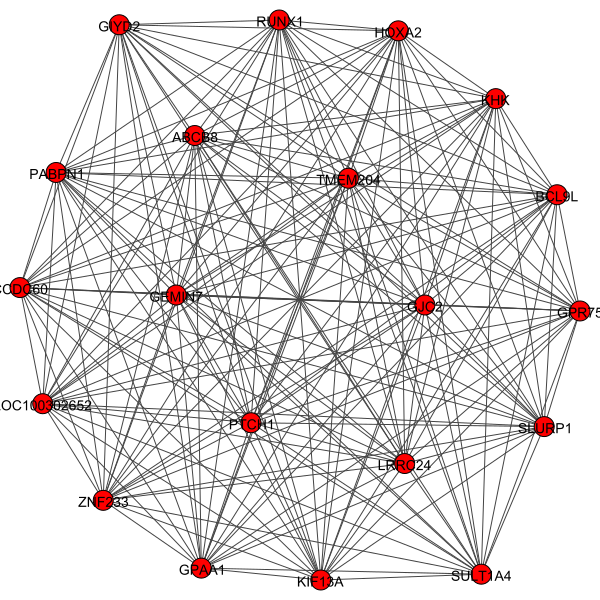

6 / 87
(189L, 2L)
6 [0]


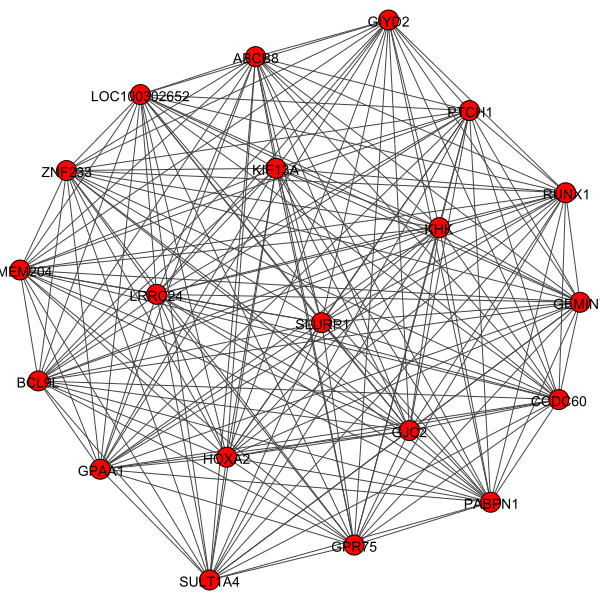

7 / 87
(189L, 2L)
7 [0]


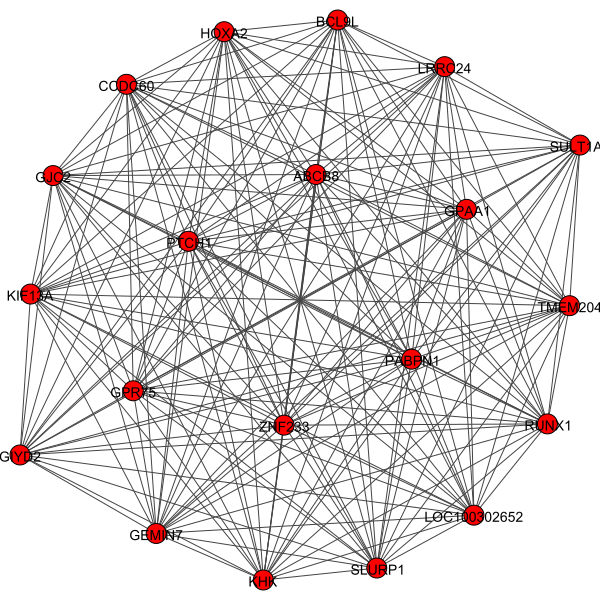

8 / 87
(189L, 2L)
8 [0]


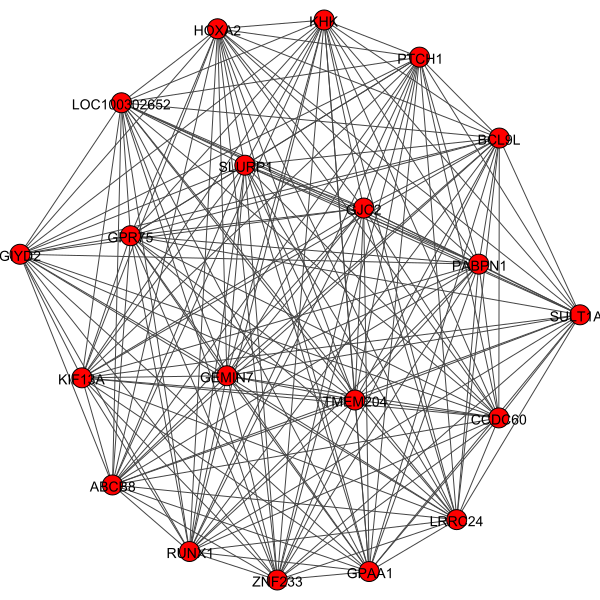

9 / 87
(189L, 2L)
9 [0]


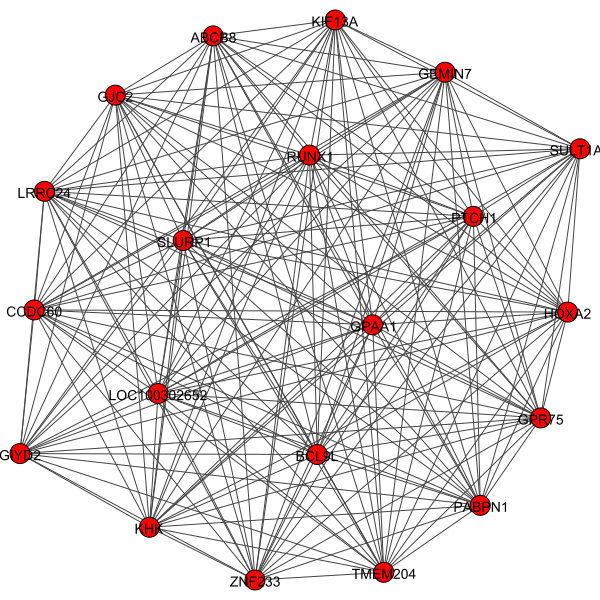

10 / 87
(189L, 2L)
10 [0]


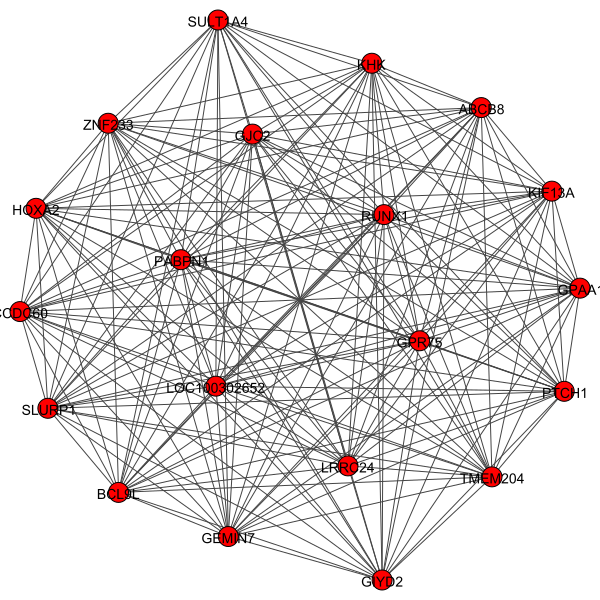

11 / 87
(189L, 2L)
11 [0]


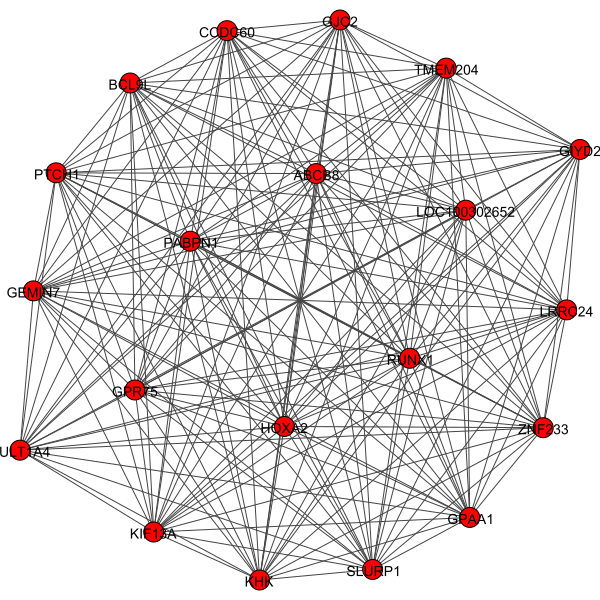

12 / 87
(189L, 2L)
12 [0]


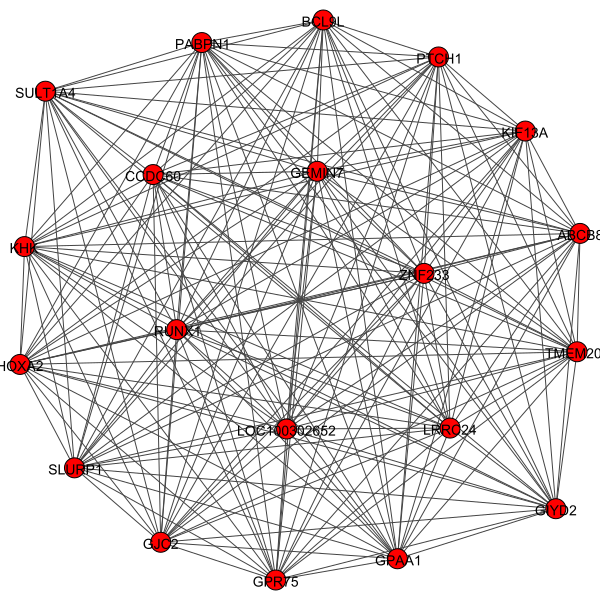

13 / 87
(189L, 2L)
13 [0]


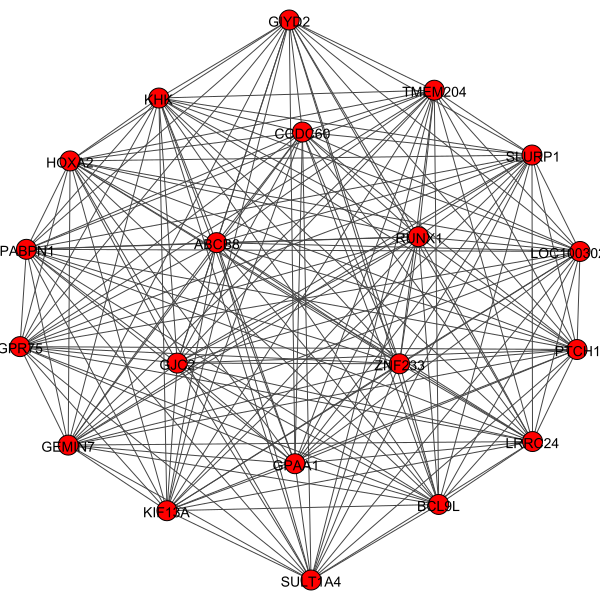

14 / 87
(189L, 2L)
14 [0]


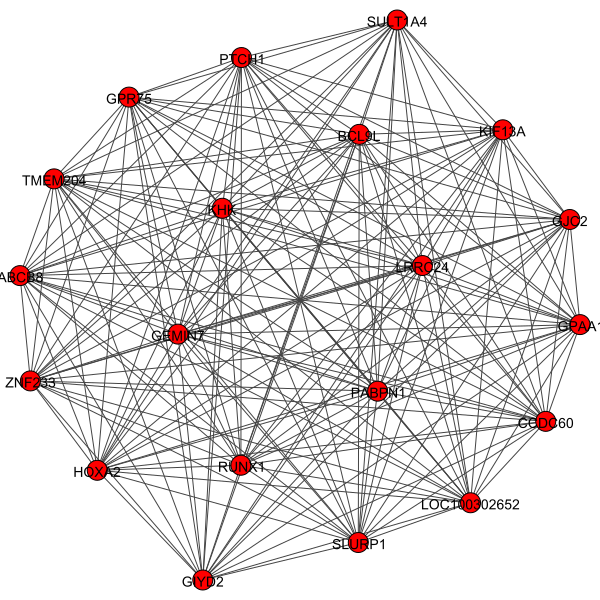

15 / 87
(189L, 2L)
15 [0]


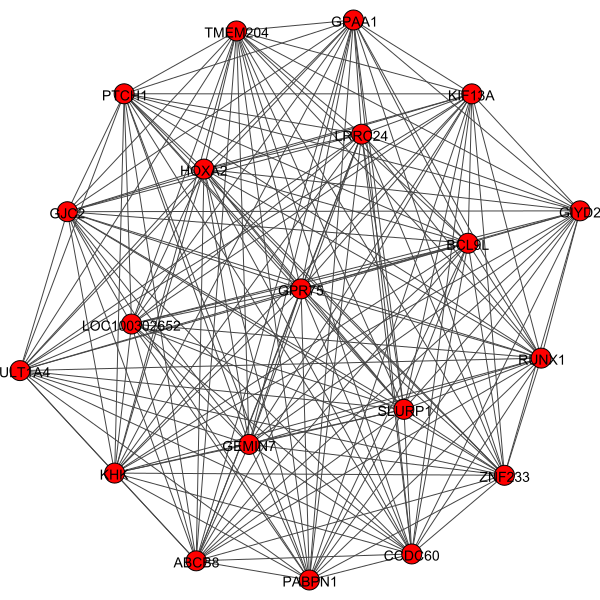

16 / 87
(189L, 2L)
16 [0]


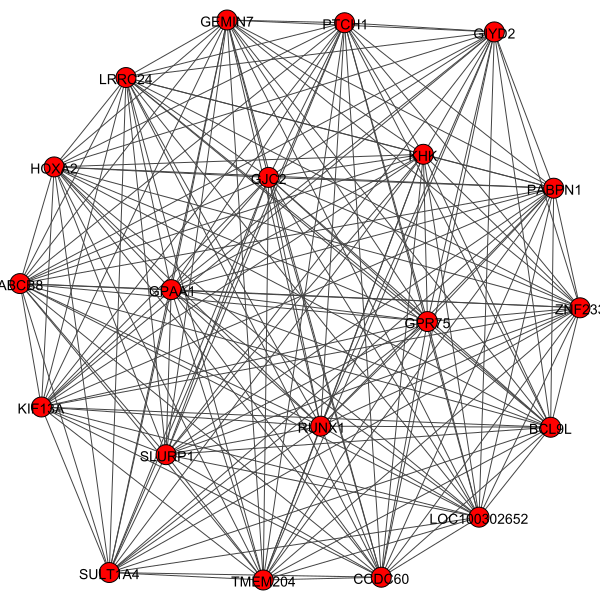

17 / 87
(189L, 2L)
17 [0]


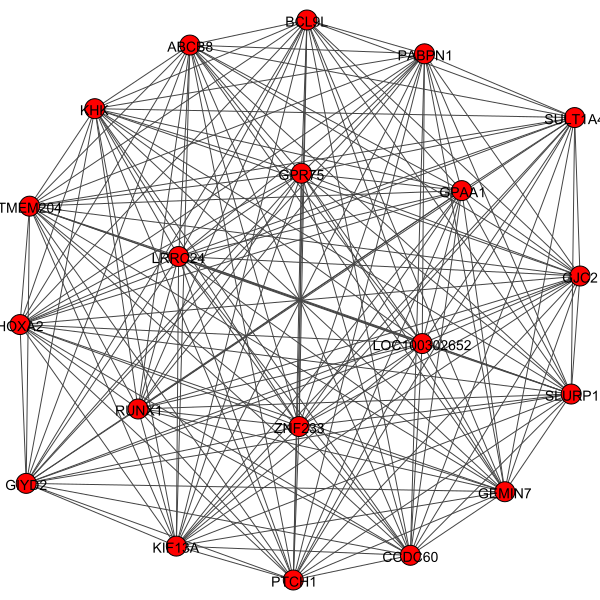

18 / 87
(189L, 2L)
18 [0]


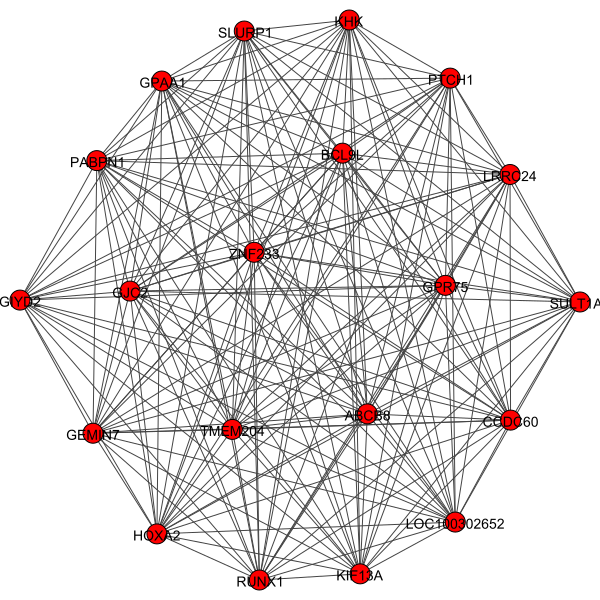

19 / 87
(189L, 2L)
19 [0]


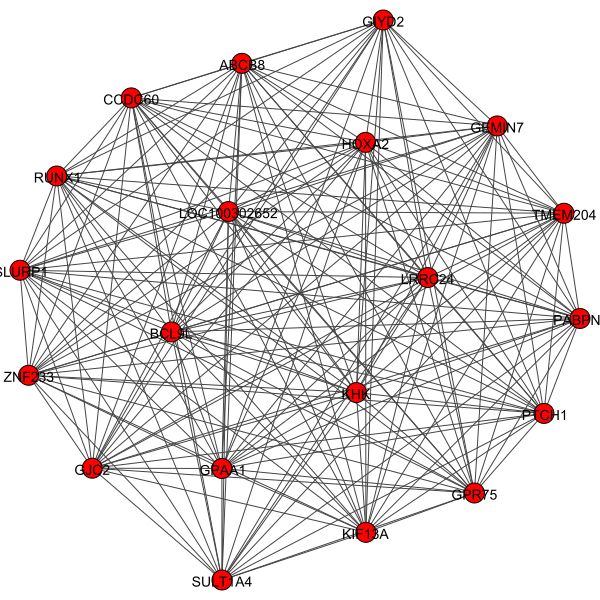

20 / 87
(189L, 2L)
20 [0]


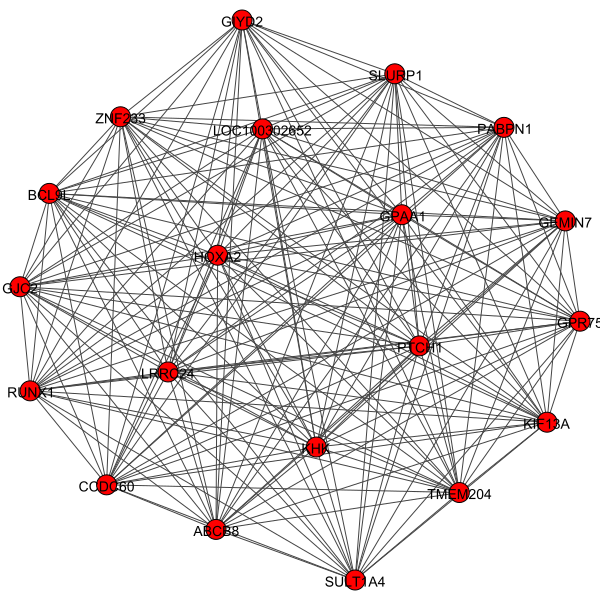

21 / 87
(189L, 2L)
21 [0]


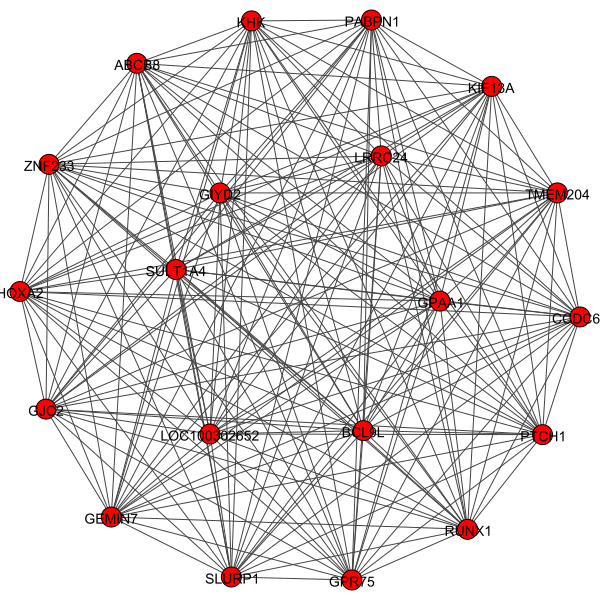

22 / 87
(189L, 2L)
22 [0]


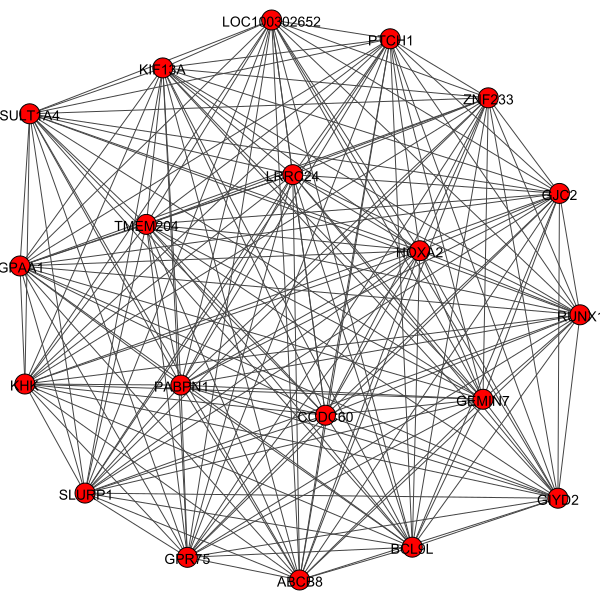

23 / 87
(189L, 2L)
23 [0]


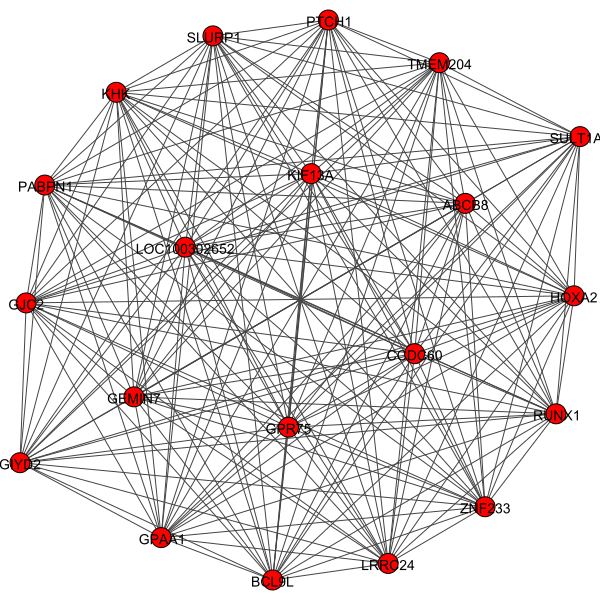

24 / 87
(189L, 2L)
24 [0]


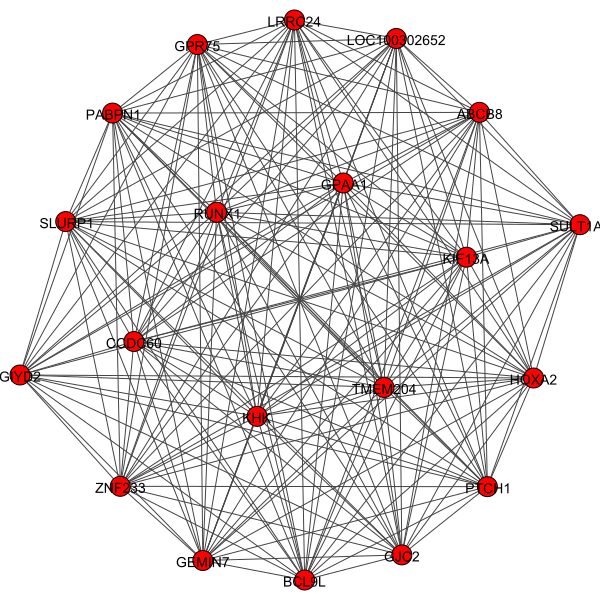

25 / 87
(189L, 2L)
25 [0]


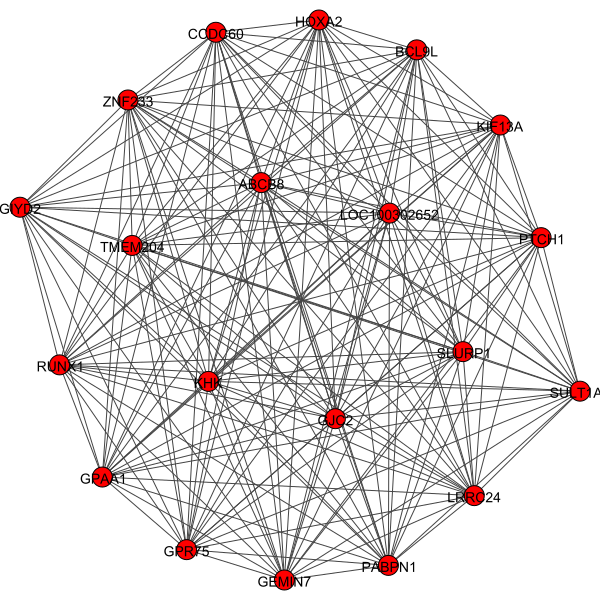

26 / 87
(189L, 2L)
26 [0]


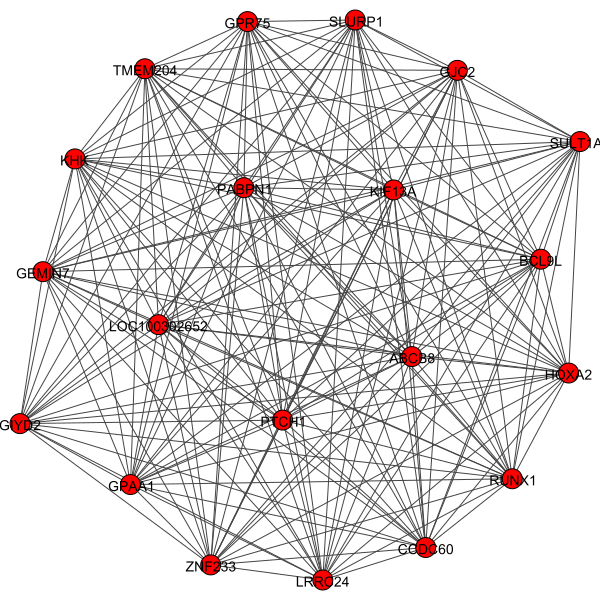

27 / 87
(189L, 2L)
27 [0]


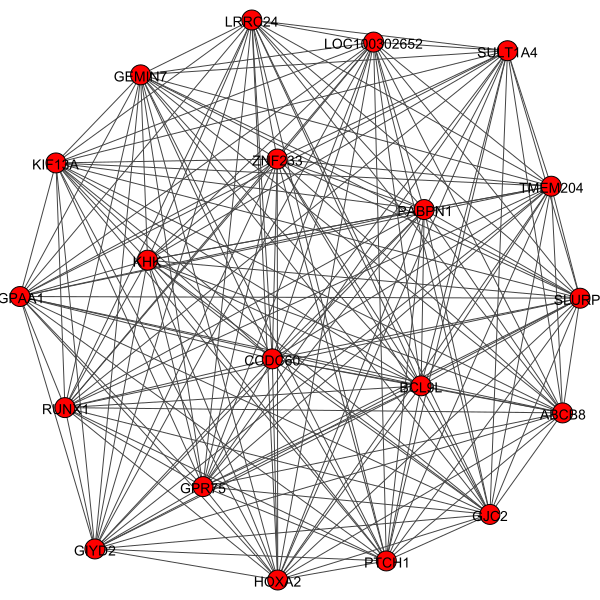

28 / 87
(189L, 2L)
28 [0]


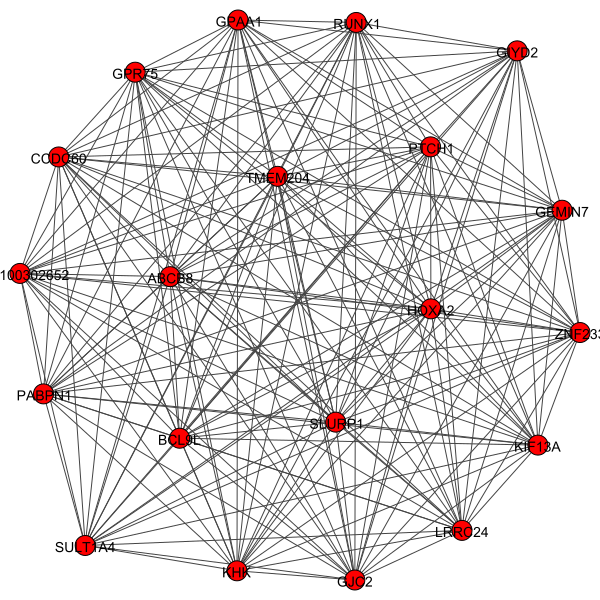

29 / 87
(119L, 2L)
29 [1]


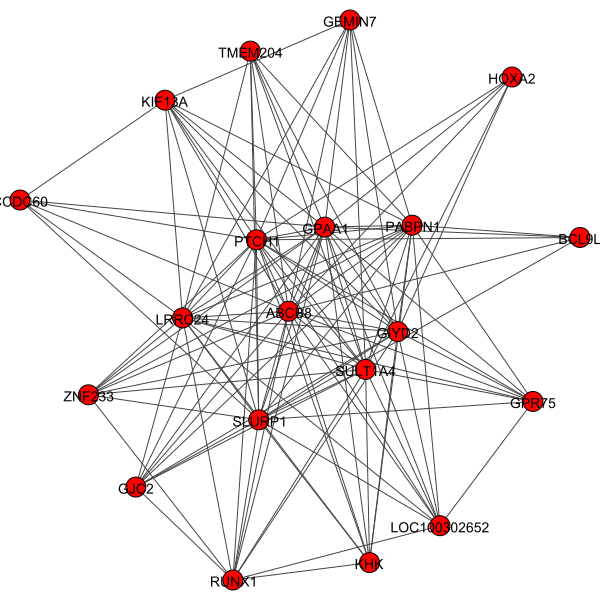

30 / 87
(162L, 2L)
30 [1]


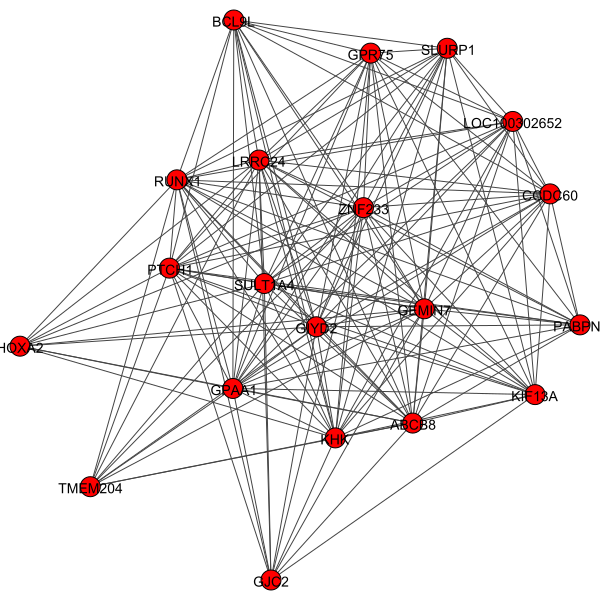

31 / 87
(148L, 2L)
31 [1]


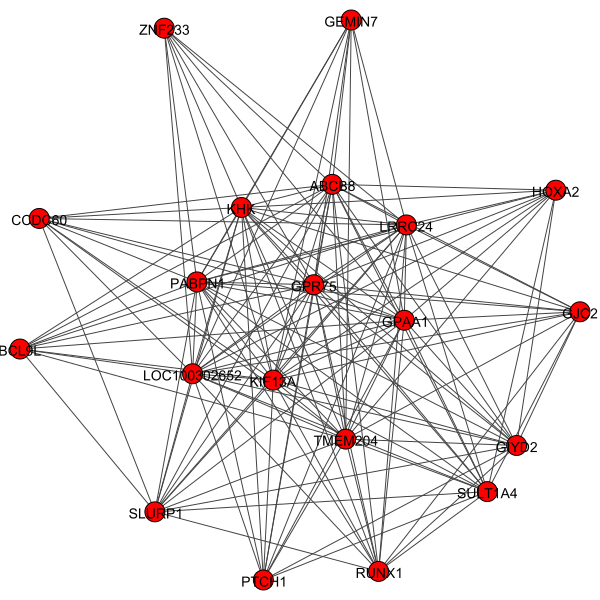

32 / 87
(163L, 2L)
32 [1]


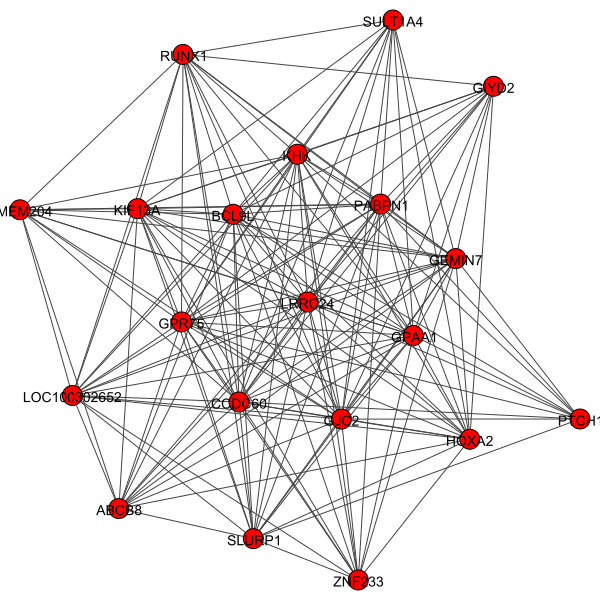

33 / 87
(104L, 2L)
33 [1]


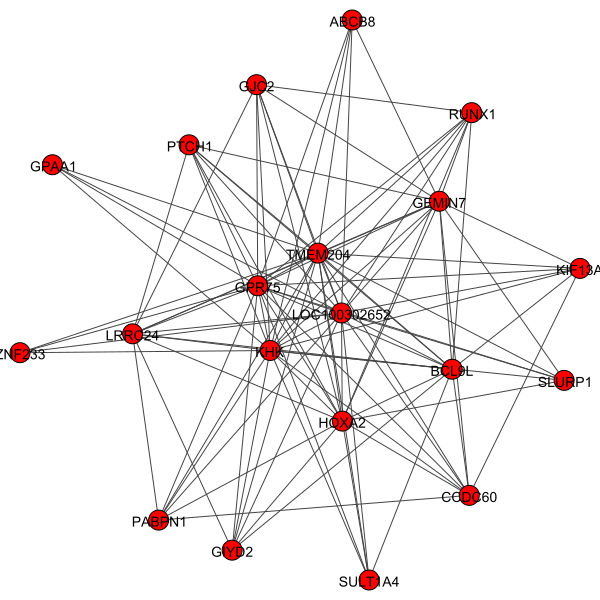

34 / 87
(116L, 2L)
34 [1]


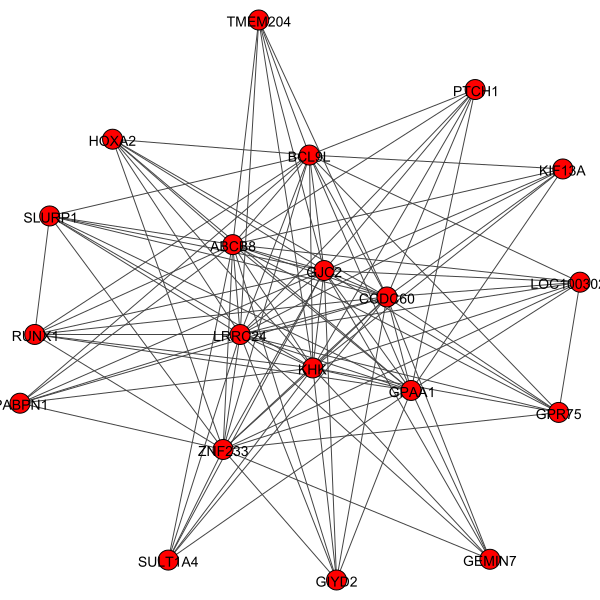

35 / 87
(90L, 2L)
35 [1]


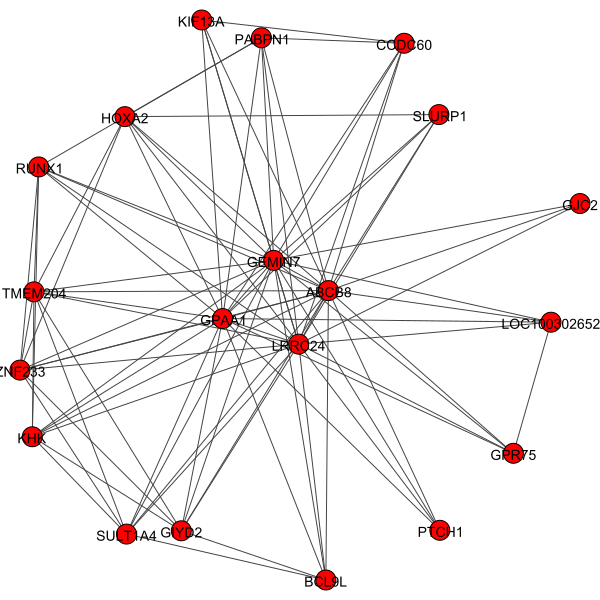

36 / 87
(117L, 2L)
36 [1]


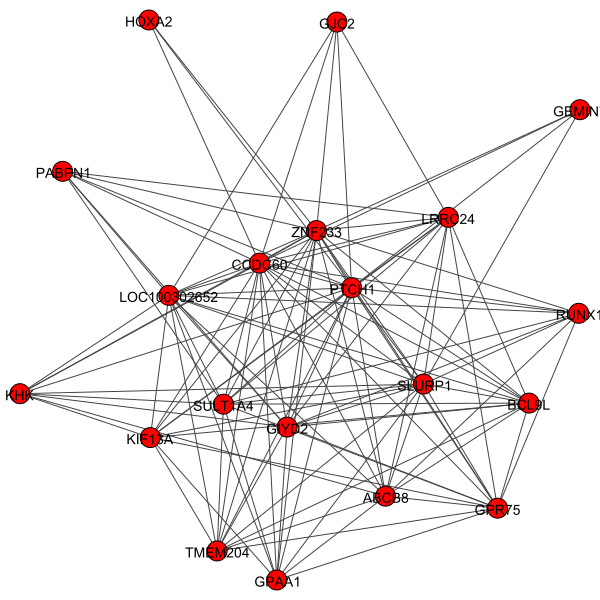

37 / 87
(138L, 2L)
37 [1]


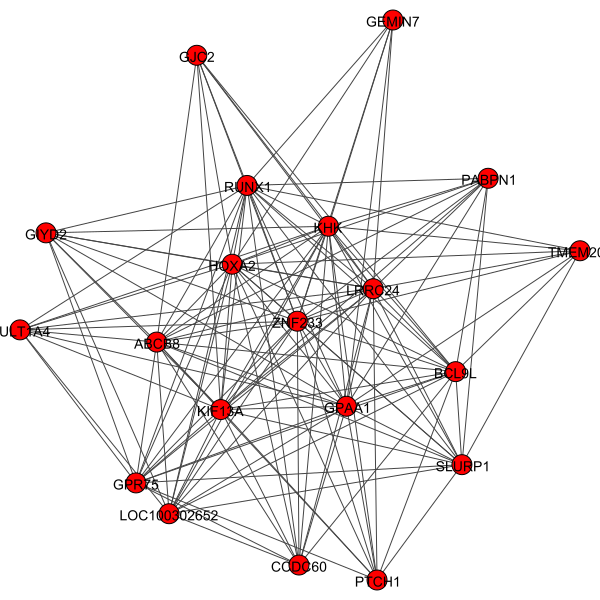

38 / 87
(31L, 2L)
38 [1]


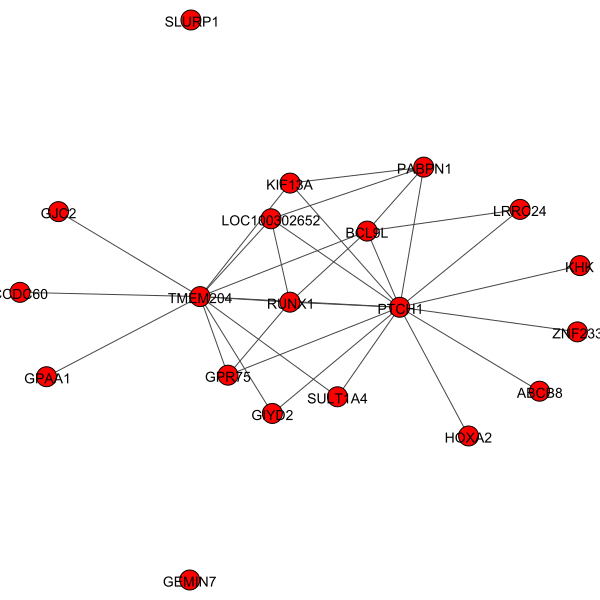

39 / 87
(96L, 2L)
39 [1]


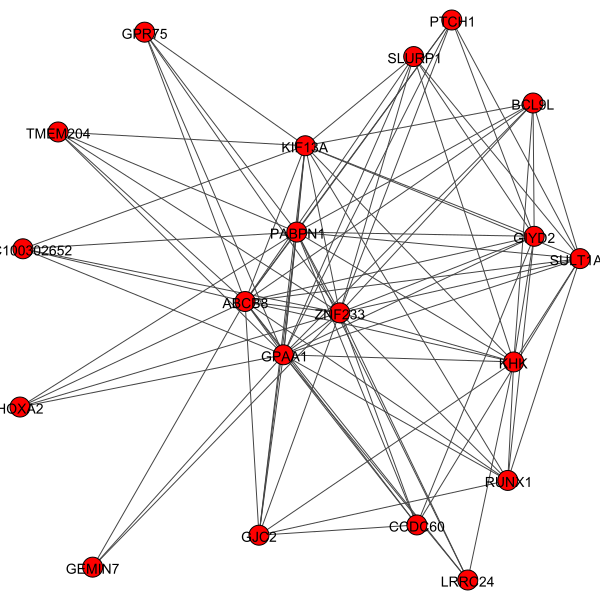

40 / 87
(74L, 2L)
40 [1]


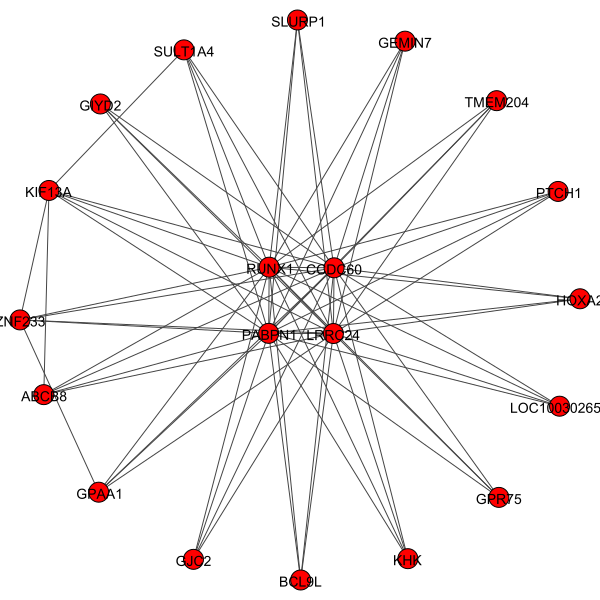

41 / 87
(89L, 2L)
41 [1]


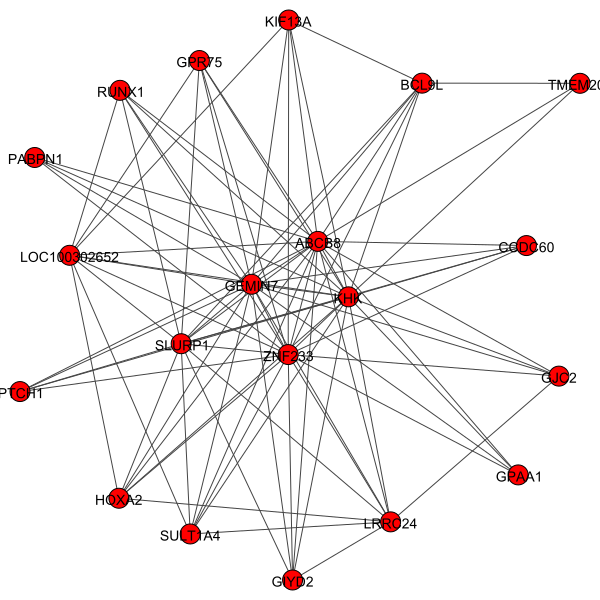

42 / 87
(47L, 2L)
42 [1]


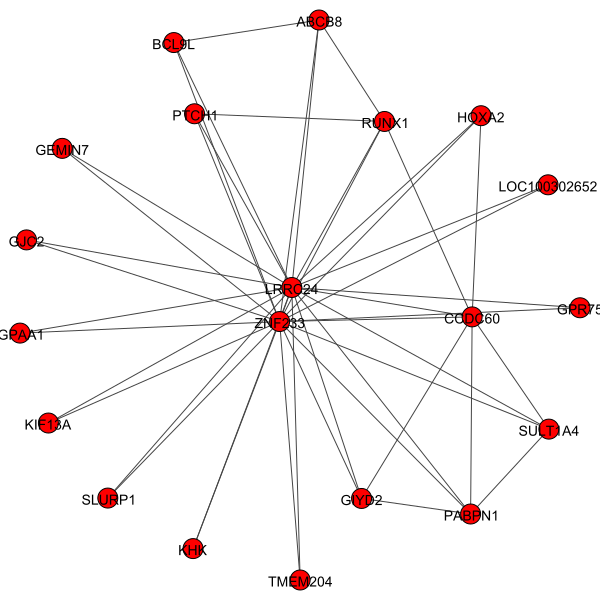

43 / 87
(86L, 2L)
43 [1]


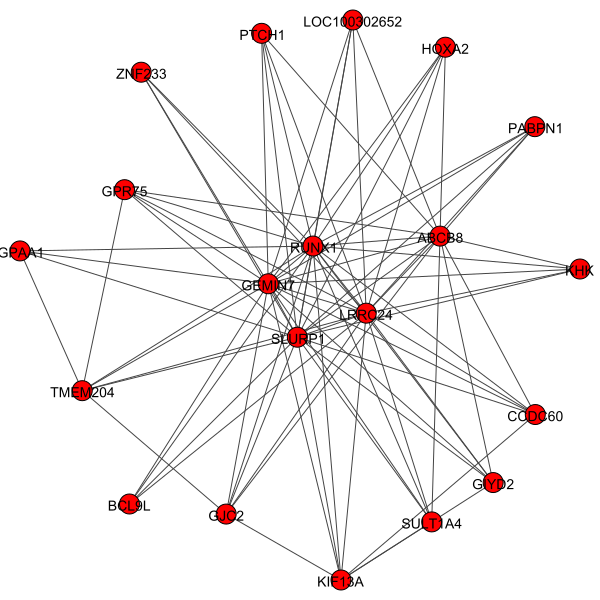

44 / 87
(136L, 2L)
44 [1]


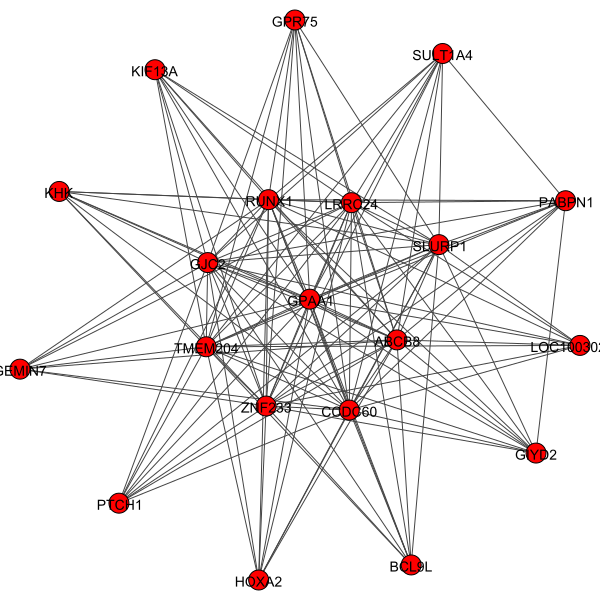

45 / 87
(121L, 2L)
45 [1]


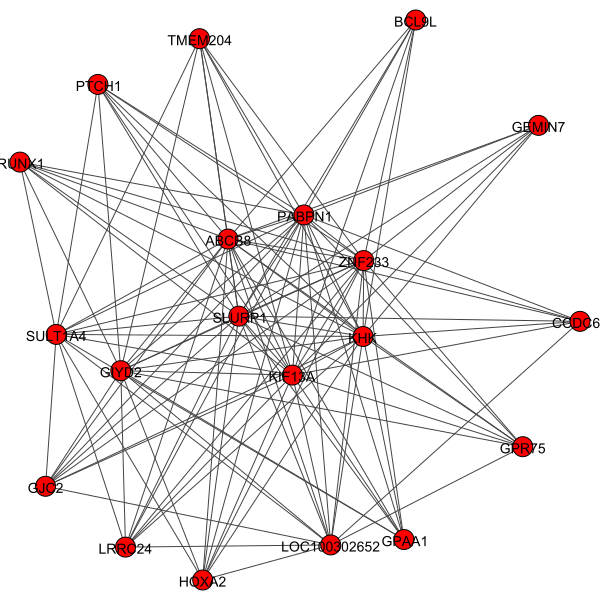

46 / 87
(135L, 2L)
46 [1]


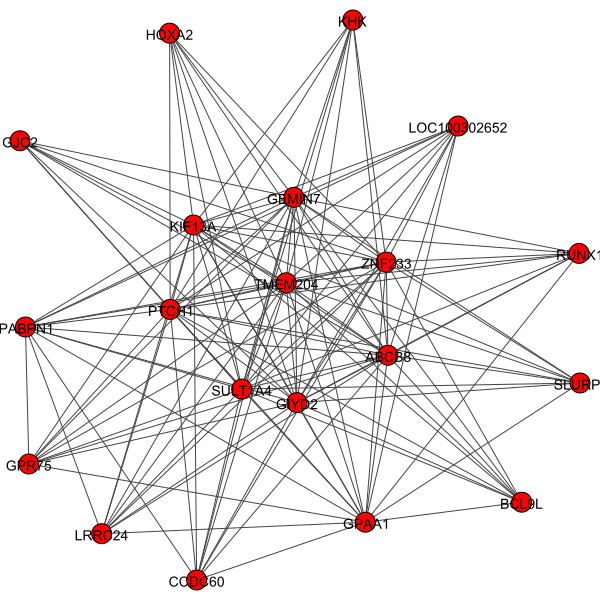

47 / 87
(111L, 2L)
47 [1]


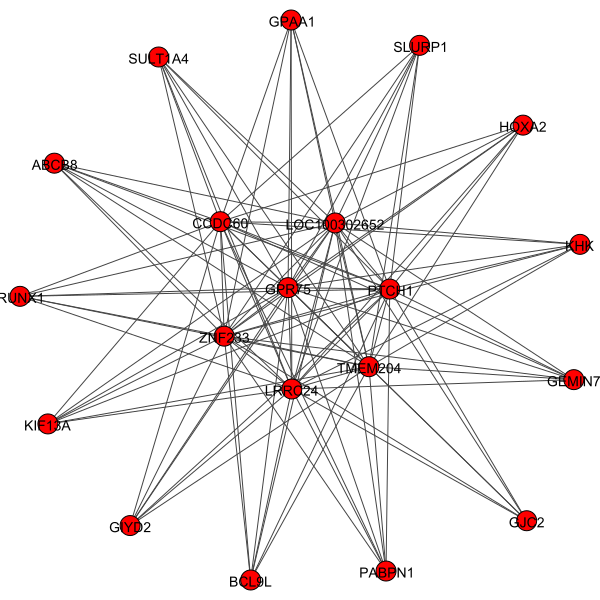

48 / 87
(175L, 2L)
48 [1]


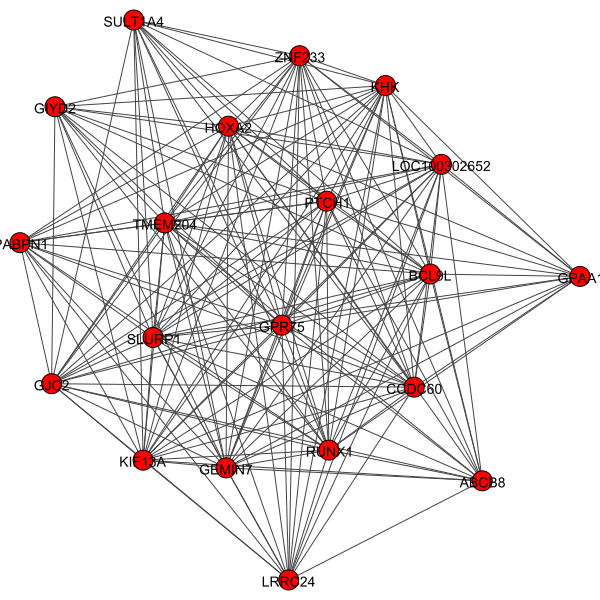

49 / 87
(62L, 2L)
49 [1]


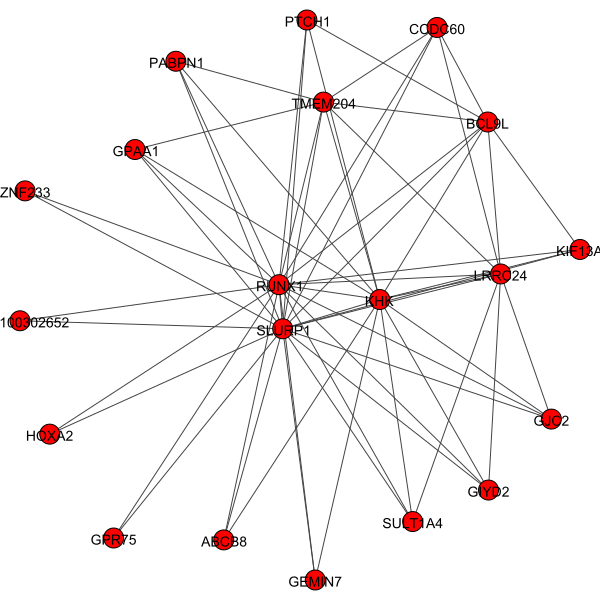

50 / 87
(112L, 2L)
50 [1]


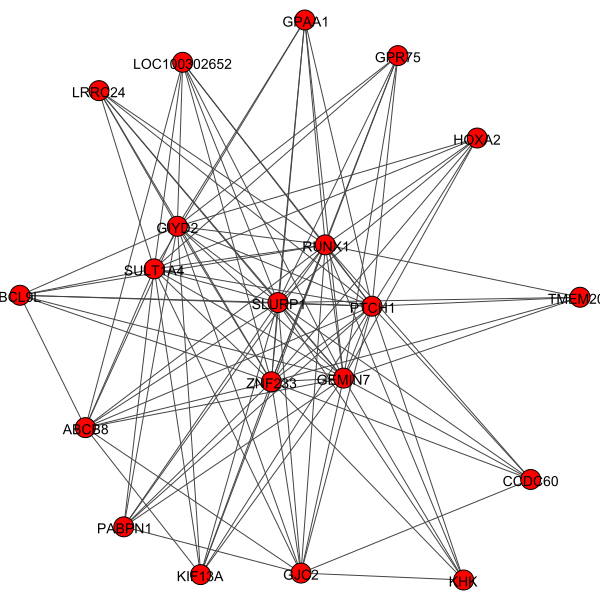

51 / 87
(75L, 2L)
51 [1]


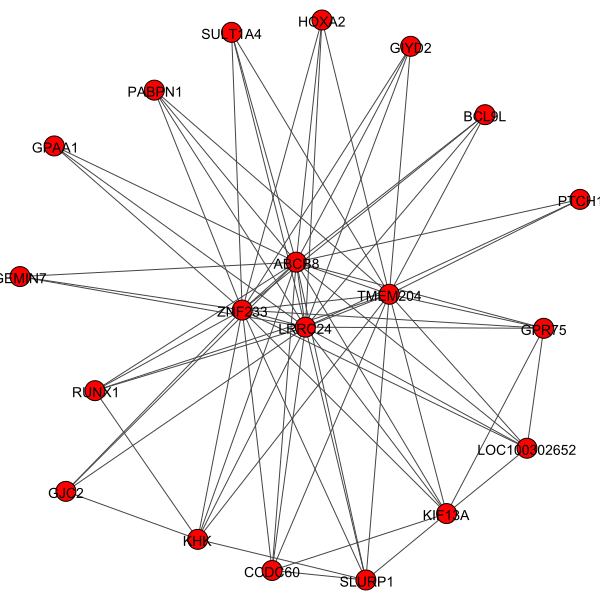

52 / 87
(105L, 2L)
52 [1]


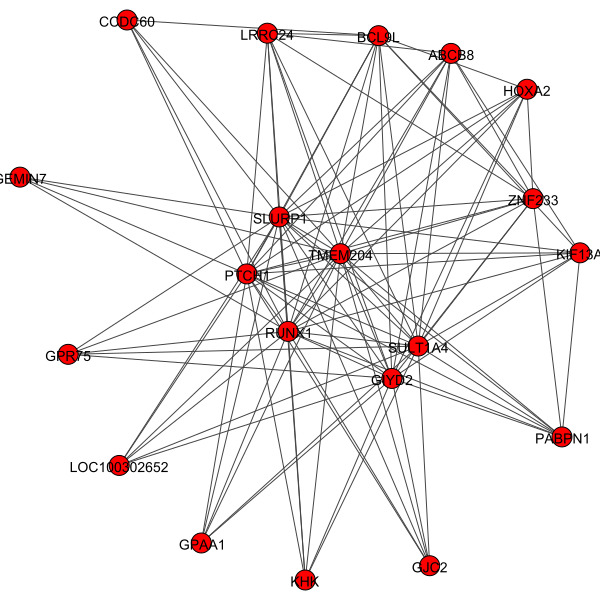

53 / 87
(100L, 2L)
53 [1]


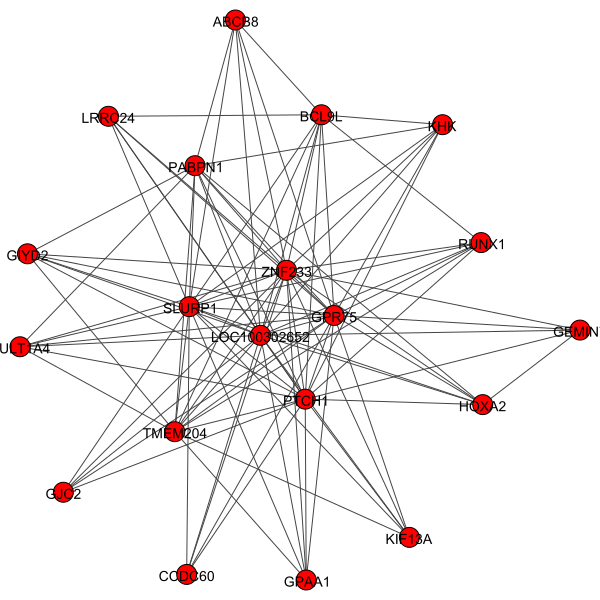

54 / 87
(145L, 2L)
54 [1]


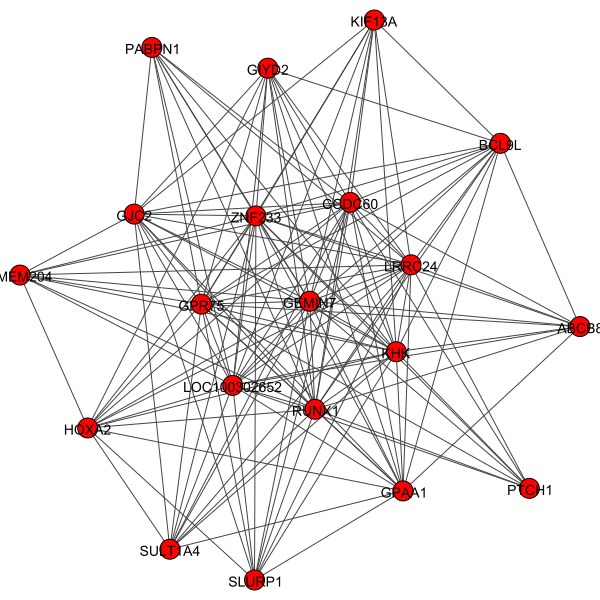

55 / 87
(105L, 2L)
55 [1]


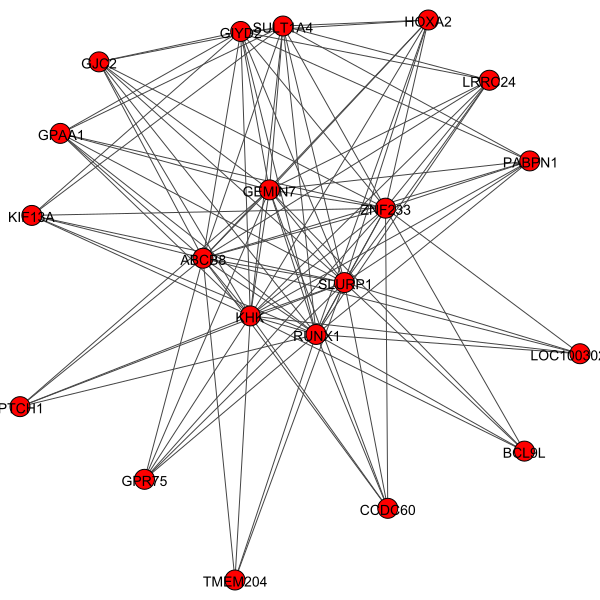

56 / 87
(94L, 2L)
56 [1]


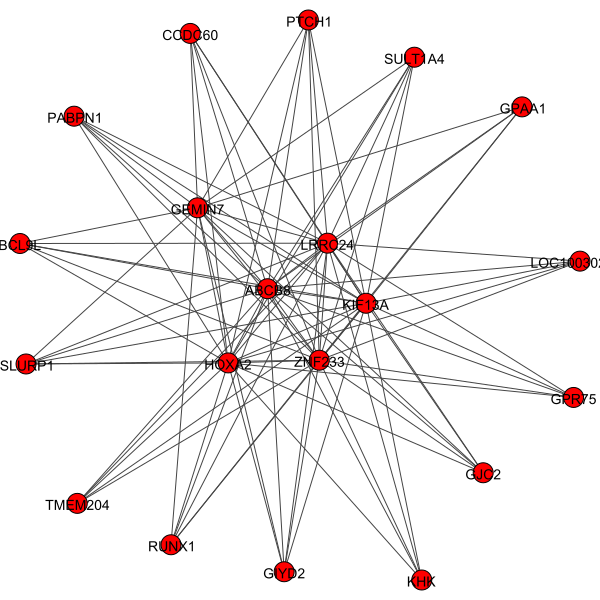

57 / 87
(54L, 2L)
57 [1]


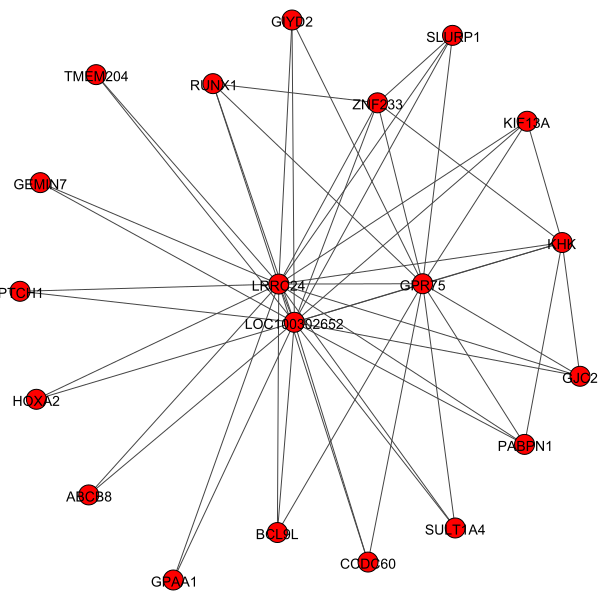

58 / 87
(112L, 2L)
58 [2]


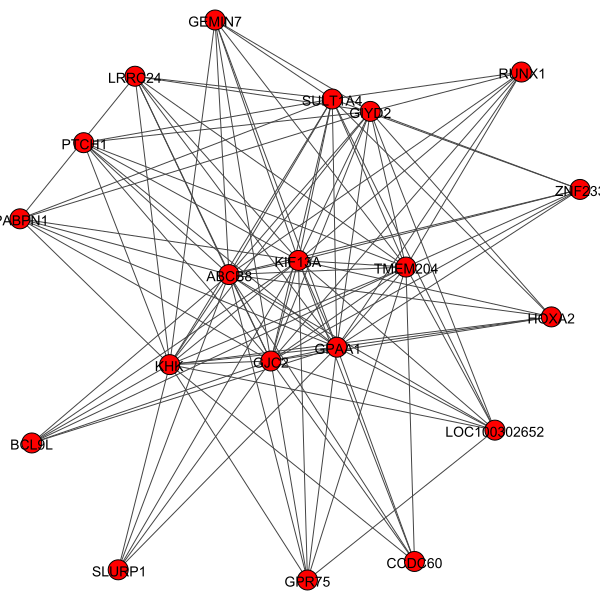

59 / 87
(119L, 2L)
59 [2]


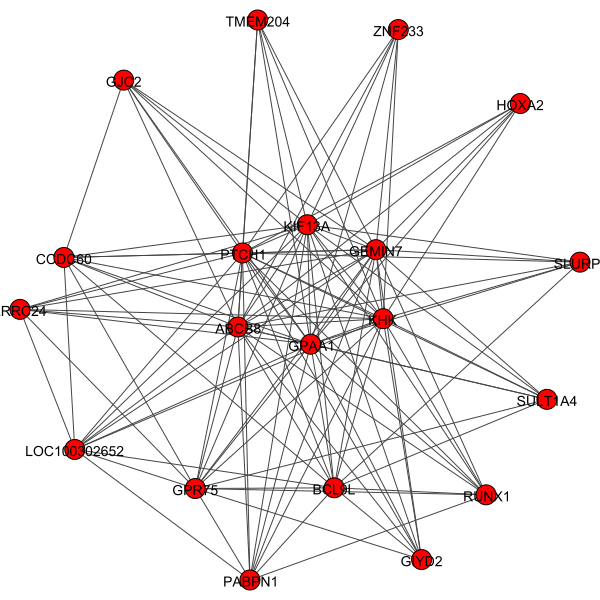

60 / 87
(123L, 2L)
60 [2]


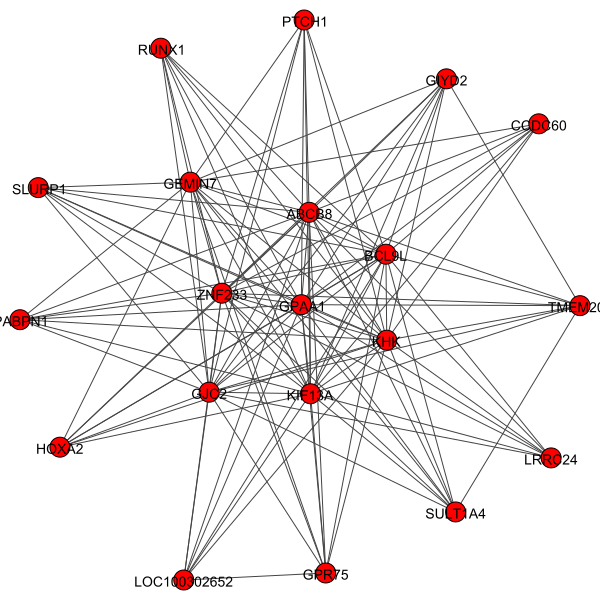

61 / 87
(145L, 2L)
61 [2]


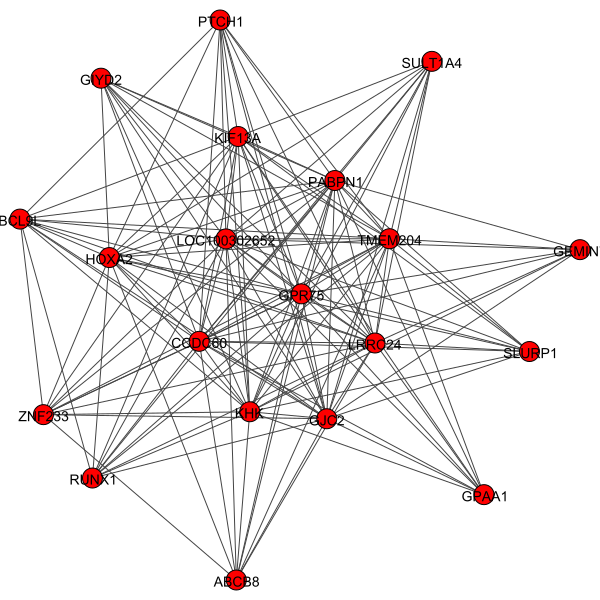

62 / 87
(32L, 2L)
62 [2]


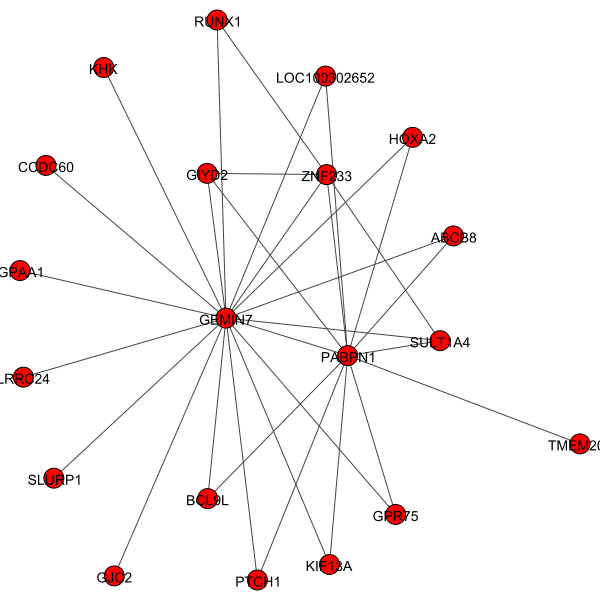

63 / 87
(69L, 2L)
63 [2]


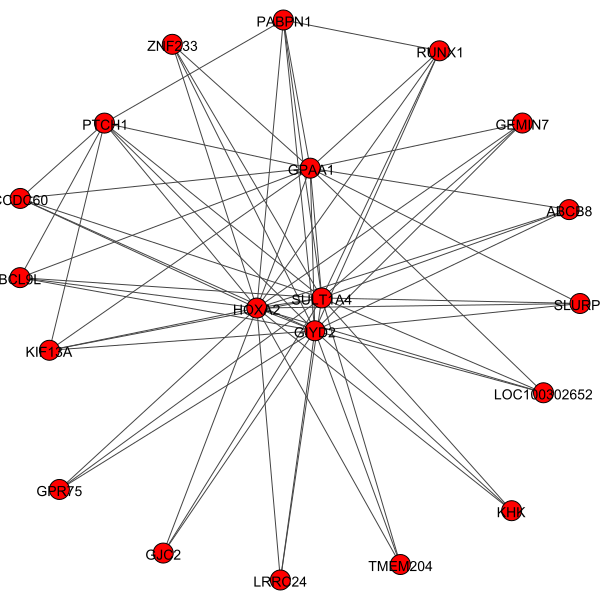

64 / 87
(54L, 2L)
64 [2]


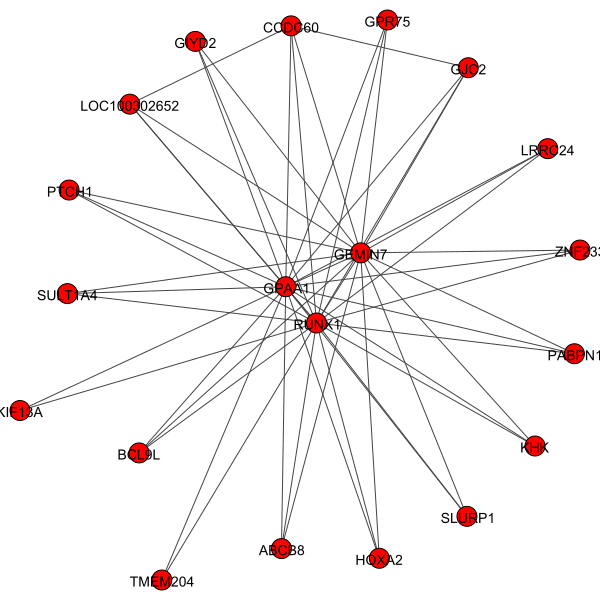

65 / 87
(29L, 2L)
65 [2]


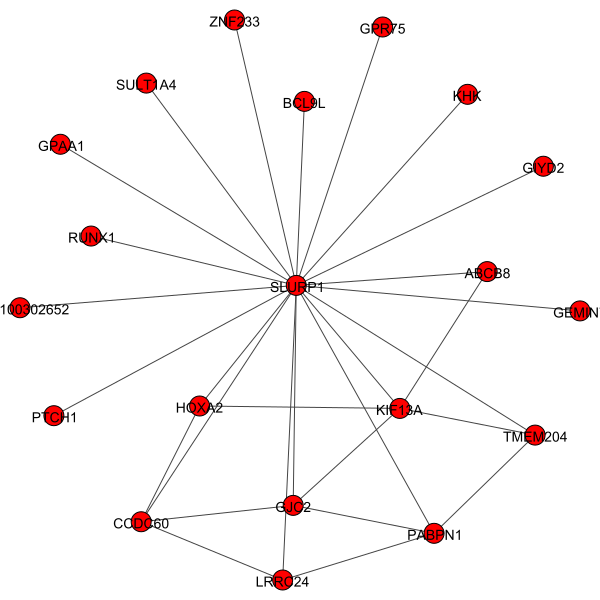

66 / 87
(46L, 2L)
66 [2]


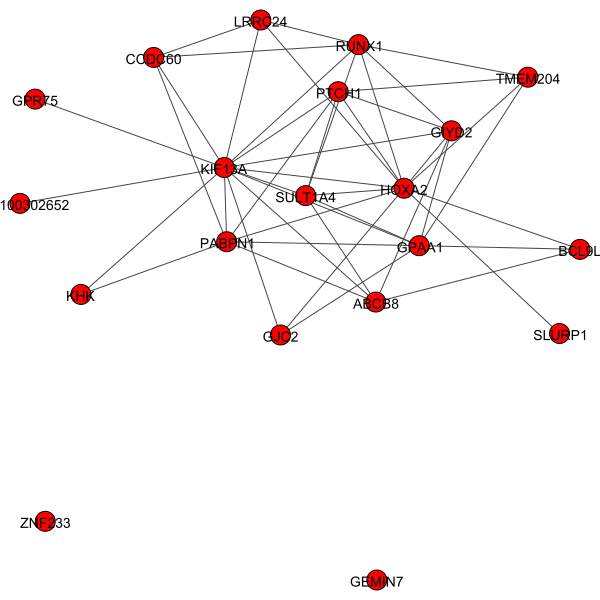

67 / 87
(73L, 2L)
67 [2]


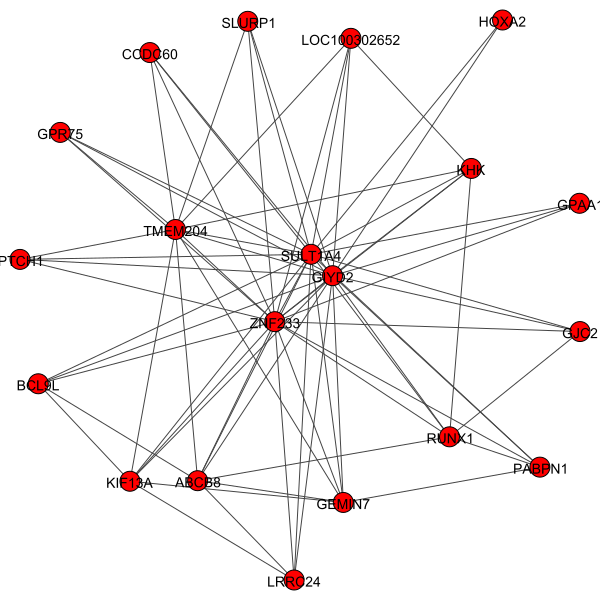

68 / 87
(95L, 2L)
68 [2]


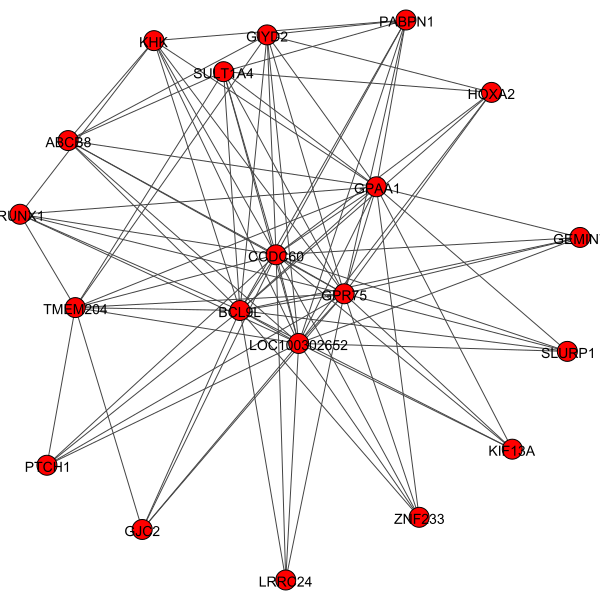

69 / 87
(129L, 2L)
69 [2]


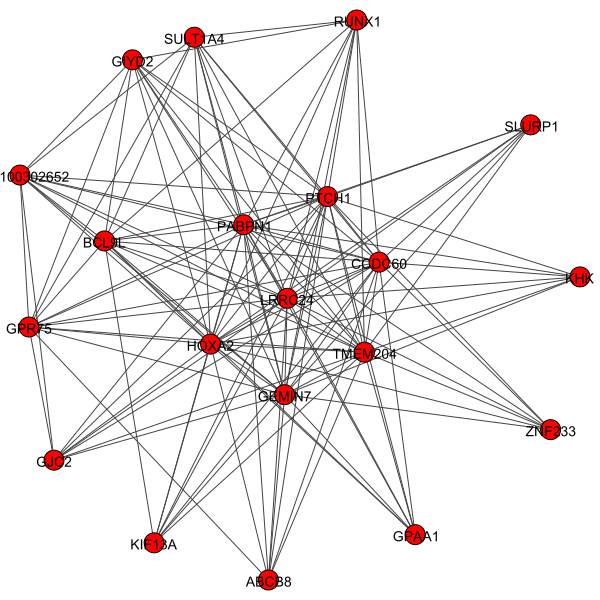

70 / 87
(78L, 2L)
70 [2]


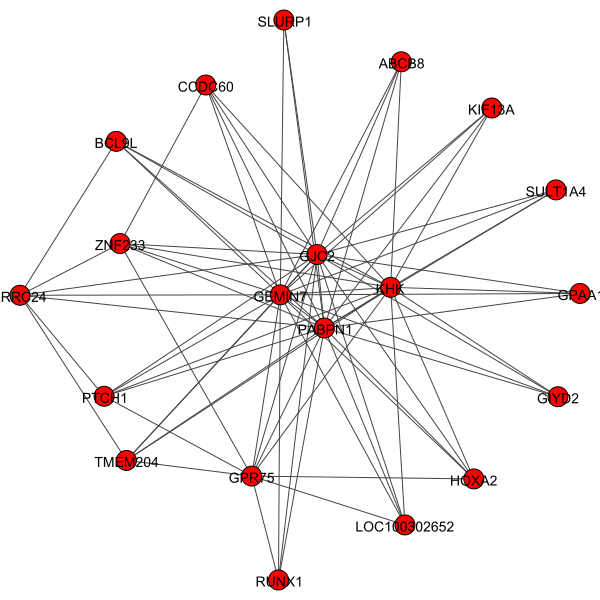

71 / 87
(77L, 2L)
71 [2]


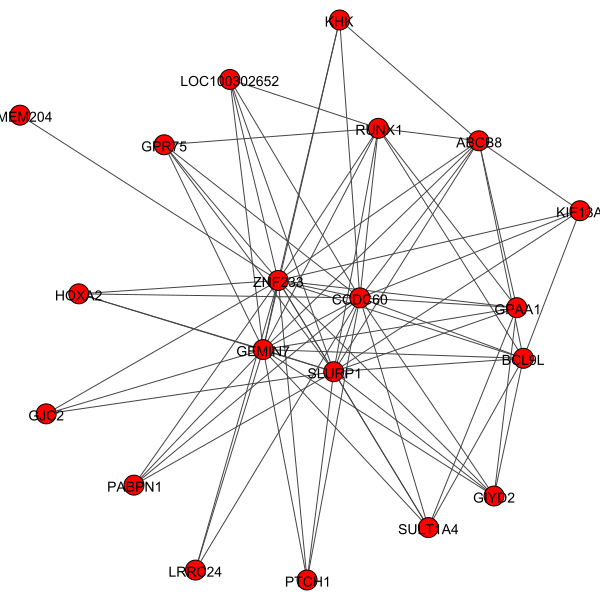

72 / 87
(113L, 2L)
72 [2]


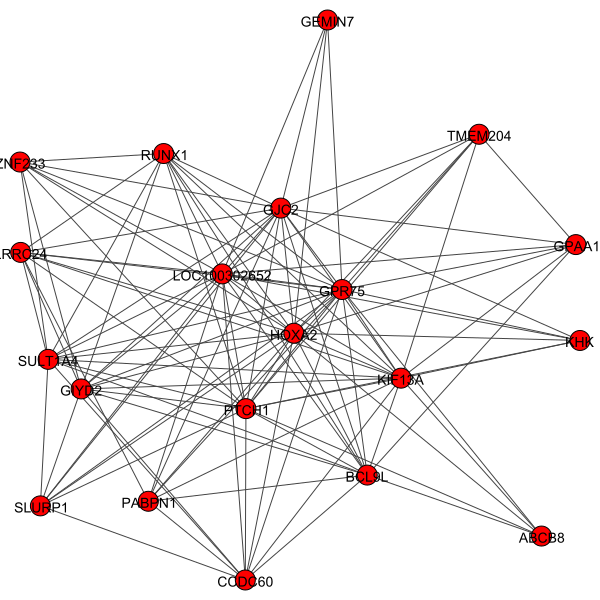

73 / 87
(90L, 2L)
73 [2]


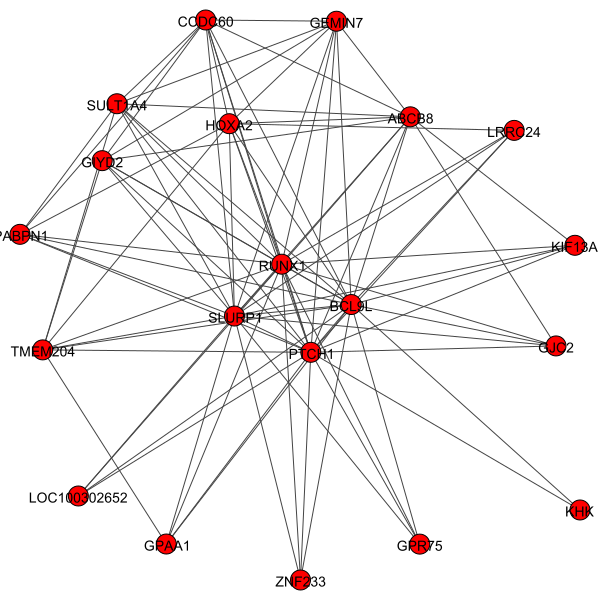

74 / 87
(72L, 2L)
74 [2]


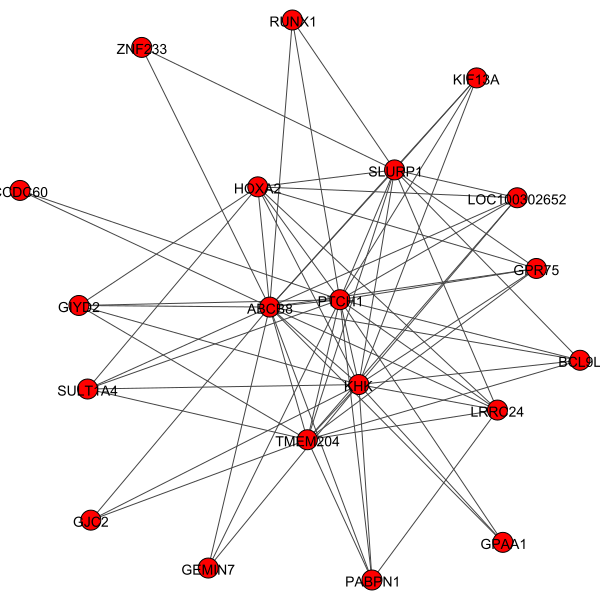

75 / 87
(96L, 2L)
75 [2]


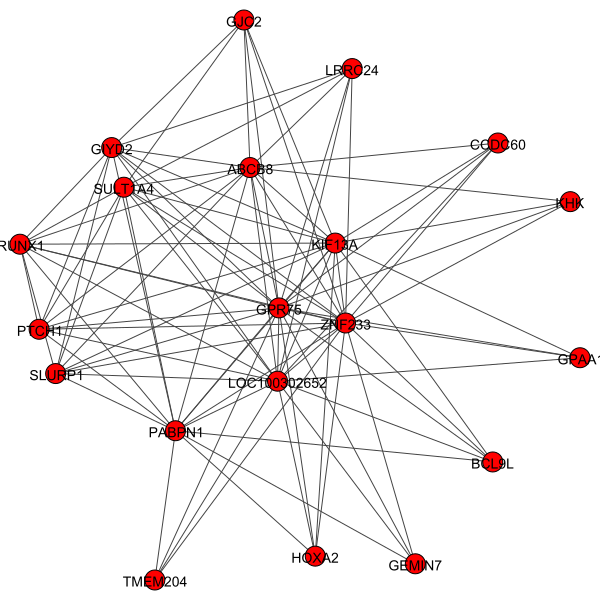

76 / 87
(39L, 2L)
76 [2]


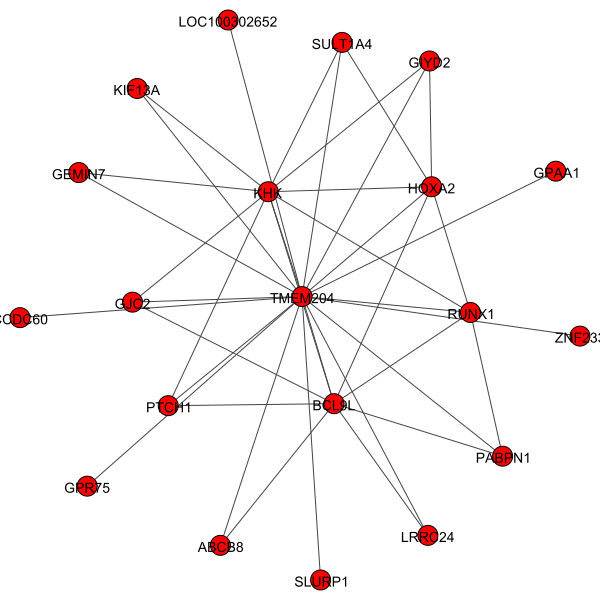

77 / 87
(139L, 2L)
77 [2]


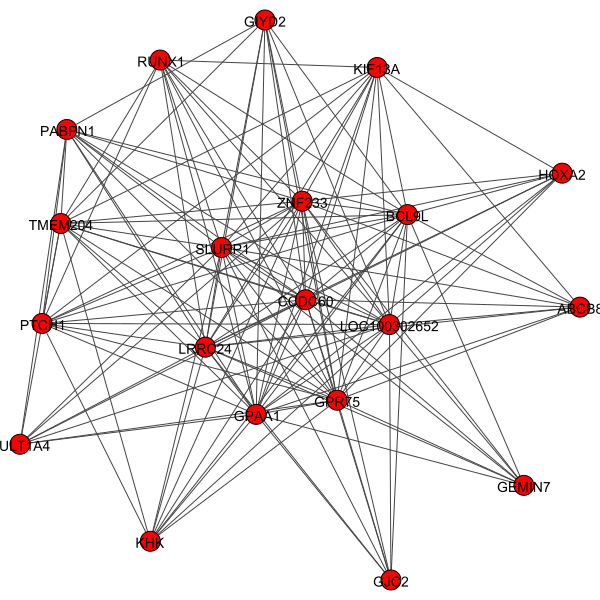

78 / 87
(37L, 2L)
78 [2]


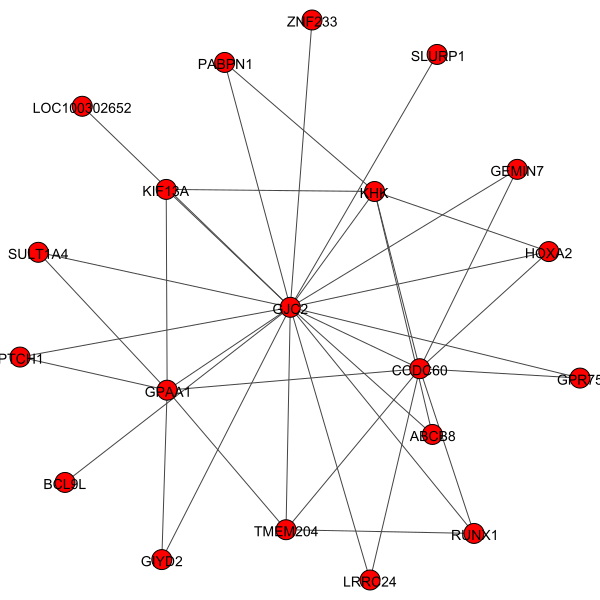

79 / 87
(56L, 2L)
79 [2]


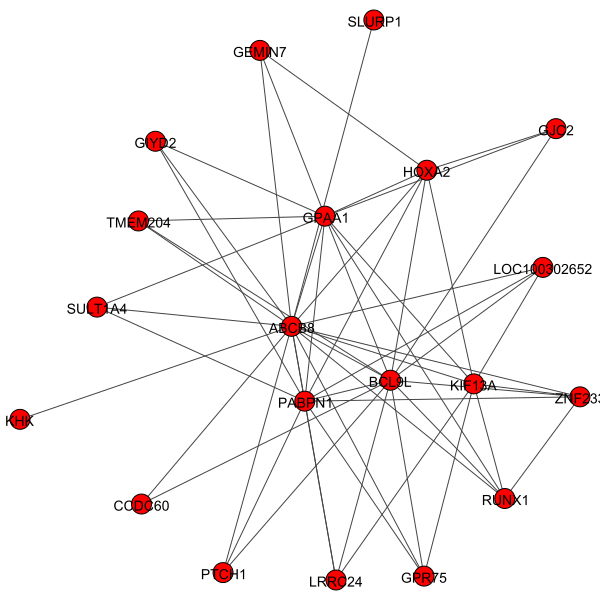

80 / 87
(84L, 2L)
80 [2]


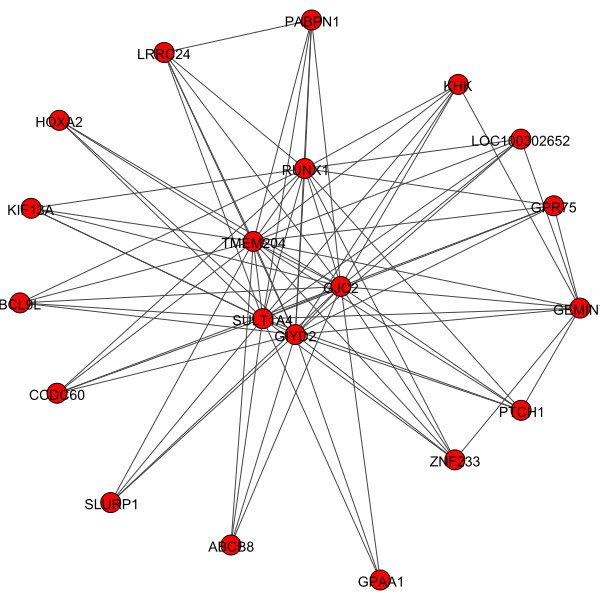

81 / 87
(36L, 2L)
81 [2]


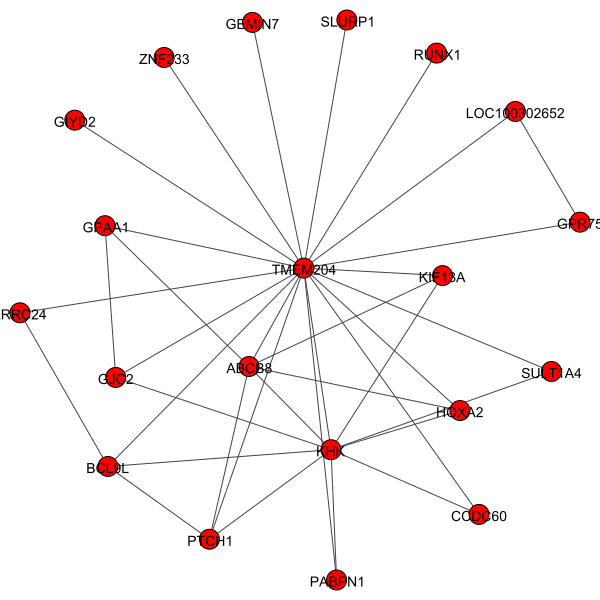

82 / 87
(83L, 2L)
82 [2]


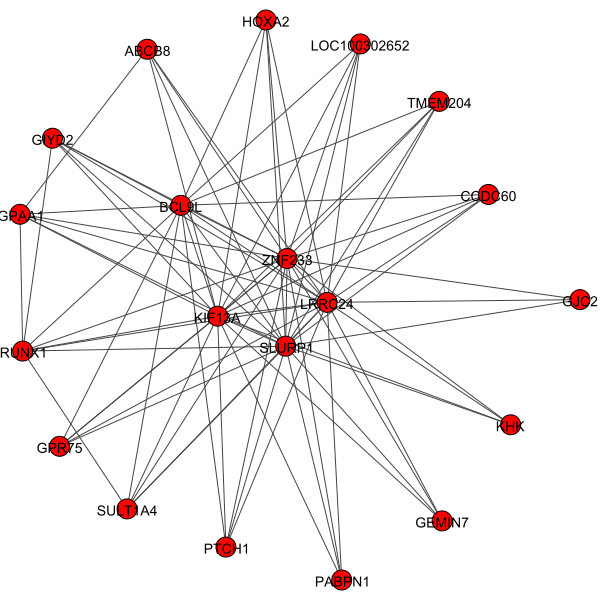

83 / 87
(166L, 2L)
83 [2]


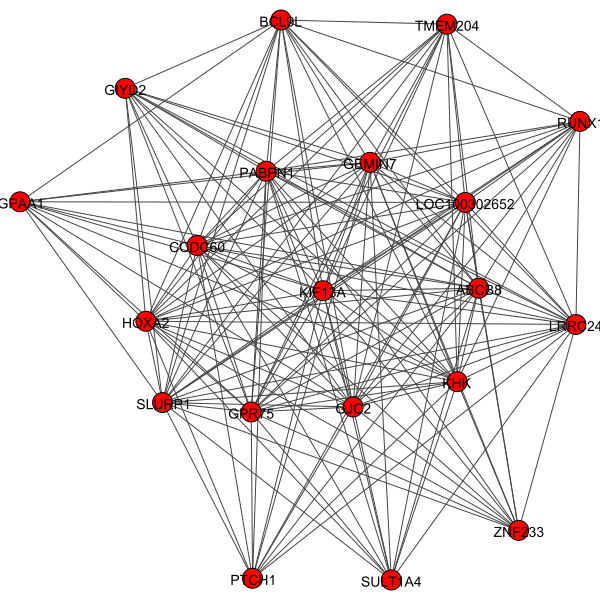

84 / 87
(85L, 2L)
84 [2]


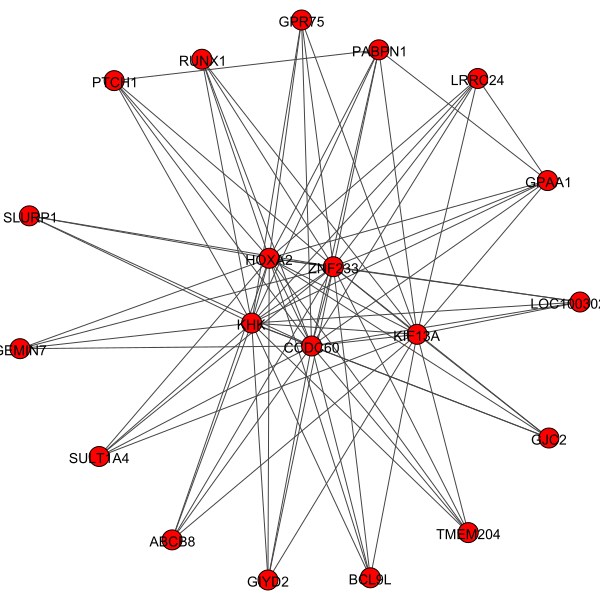

85 / 87
(29L, 2L)
85 [2]


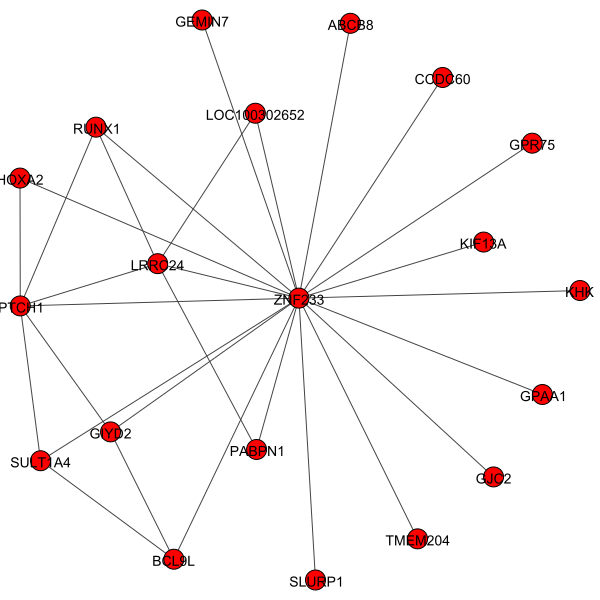

86 / 87
(56L, 2L)
86 [2]


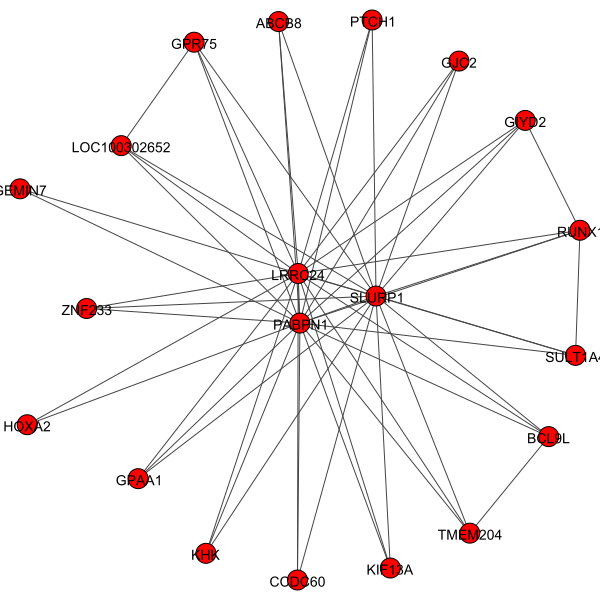

In [37]:
from IPython.core.display import display, SVG

for id_thr, thr_p in enumerate(config.params["thr_p"]):
    if id_thr != 5:
        continue
    print thr_p
    for id_sample in config.params["id_sample"]:
        print id_sample, '/', config.params["id_sample"].num_ticks
        #print config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
        data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
        m_cur = data['G']
        m_cur = np.unpackbits(m_cur, axis = 1)[:, :config.params["num_genes"].value].astype(np.bool)
        m_cur = m_cur[np.ix_(vertices, vertices)]
        edges = np.transpose(np.nonzero(m_cur))
        print edges.shape
        
        g_cur = igraph.Graph(vertex_attrs={"label":genes_names[vertices]}, edges=edges.tolist(), directed=False)
        layout = g_cur.layout("kk")
        p = igraph.plot(g_cur, layout = layout)
        
        print id_sample, y[id_sample]
        display(SVG(p._repr_svg_()))
        
        
        #plot = Plot("plot.png", bbox=(600, 650), background="white")

        # Create the graph and add it to the plot
        #plot.add(g_cur, layout = layout, bbox=(20, 70, 580, 630))

        # Make the plot draw itself on the Cairo surface
        #plot.redraw()
        
        #break
        '''
        if id_sample in config.params["mongoloids_mask"].value:
            
        if id_sample in config.params["siblings_mask"].value:
            
        if id_sample in config.params["mothers_mask"].value:
        '''
        
    #plot_hist_degree(degrees_mongoloids, degrees_siblings, degrees_mothers)

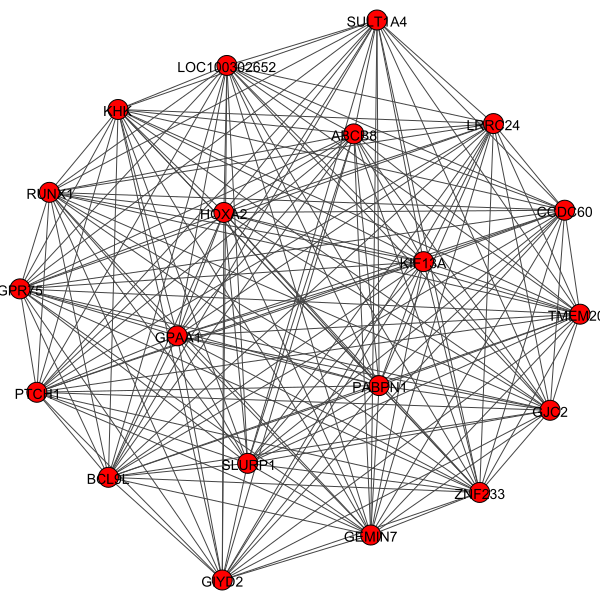

In [29]:

igraph.plot(g_cur, layout = layout)